In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import math
from sklearn import tree
# sklearn ML libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')
train_salaries = pd.read_csv('train_salaries.csv')

In [3]:
train_features.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
test_features.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_salaries.head(20)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


# Checking the shape of the dataframes 

In [6]:
print(train_features.shape)
print(test_features.shape)
print(train_salaries.shape)

(1000000, 8)
(1000000, 8)
(1000000, 2)


In [7]:
train_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [8]:
test_features.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [9]:
train_salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


# Merging two dataframes

In [10]:
train_data = train_features.merge(train_salaries, how='left', on='jobId')

In [11]:
train_data.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [12]:
train_data.describe(include = np.number)

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [13]:
train_data.describe(include = 'O')

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685346187,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


# Cleaning the Data

Before we dive in to data analysis, we should perform basic cleaning. Look for:

Any missing values (np.None or np.NaN) in entire training and testing set

Any duplicated samples in training set

Any invalid yearsExperience (yearsExperience <= 0) in training set

Any invalid milesFromMetropolis (milesFromMetropolis < 0) in training set

Any invalid salary (salary < 0) in training set

# Checking for the missing data

In [14]:
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [15]:
print("Any invalid rows in test set?", test_features.isnull().sum())

Any invalid rows in test set? jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


# Checking for the duplicates

In [16]:
train_data.duplicated().sum()

0

In [17]:
test_features.duplicated().sum()

0

In [18]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


# Dropping invalid salaries


In [19]:
zero_salaries = train_data['salary']<=0
invalid_salaries = train_data[zero_salaries]

invalid_salaries


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [20]:
train_data = train_data.drop(invalid_salaries.index.tolist())

train_data.shape

(999995, 9)

In [21]:
train_data.reset_index(drop=True, inplace=True)

# View last 5 rows to verify index is reset
train_data.tail()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
999990,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999991,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999992,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999993,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
999994,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


In [22]:
#checking for missing values 
train_data = train_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999994
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


# Exploratory Data Analysis( EDA)

In [23]:
categorical_features = ['jobType','industry','companyId', 'degree', 'major' ]
numerical_features = ['yearsExperience', 'milesFromMetropolis', 'salary']

In [24]:
for cat in categorical_features:
    if cat != 'companyId' and cat != 'jobId':
       print(train_data[cat].value_counts())

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64
WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64
NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64


In [25]:
train_data.nunique()

jobId                  999995
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    279
dtype: int64

In [26]:
# Computing the skewness and kurtosis of the salary
print(' Skewness of Salary:', train_data['salary'].skew())
print(' Kurtosis of Salary:', train_data['salary'].kurt())
print('\n')
if -0.5 <= train_data['salary'].skew() <= 0.5:
    print('Salary distribution is approximately symmetric')
elif -0.5 >  train_data['salary'] > 0.5:
    print('Salary distribution is skewed')
    

 Skewness of Salary: 0.34652727907668734
 Kurtosis of Salary: -0.025750772283374967


Salary distribution is approximately symmetric


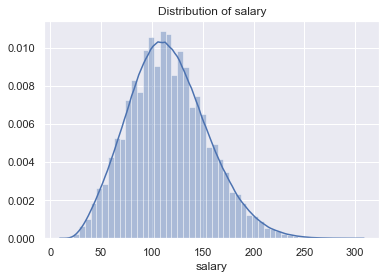

In [27]:
sns.set(style="darkgrid")
sns.distplot(train_data['salary'])
plt.title("Distribution of salary")
plt.show()

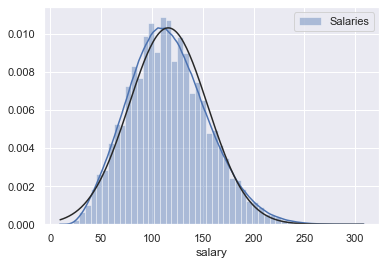

In [28]:
sns.distplot(train_data['salary'], fit=norm, label='Salaries')
plt.legend()

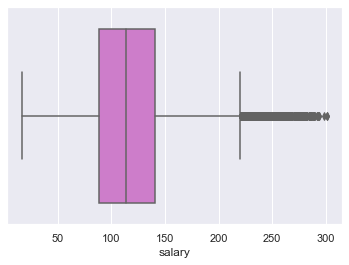

In [29]:
sns.boxplot(train_data['salary'], color = 'orchid')

In [30]:
train_data.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999994
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [32]:
def feature_plot(df, target, col): 
    categories = df[col].value_counts().index.to_list()
    n_categories = len(categories)
    if n_categories < 20 or df[col].dtype != 'int64':
        print(df[col].value_counts())
    
    plt.figure(figsize = (14,10))
    if df[col].dtype == 'int64':
        plt.subplot(2,1,1)
        if n_categories < 30:
            sns.distplot(df[col], bins = n_categories)
        else:
            sns.distplot(df[col], bins = 20)           
        plt.subplot(2,1,2)
        sns.lineplot(x = col, y = target, data = df)
    else:
        if n_categories < 20:
            plt.subplot(2,1,1)
            sns.countplot(x = col, data = df) 
            plt.subplot(2,1,2)
            sns.boxplot(x = col, y = target, data = df)
    plt.show()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64


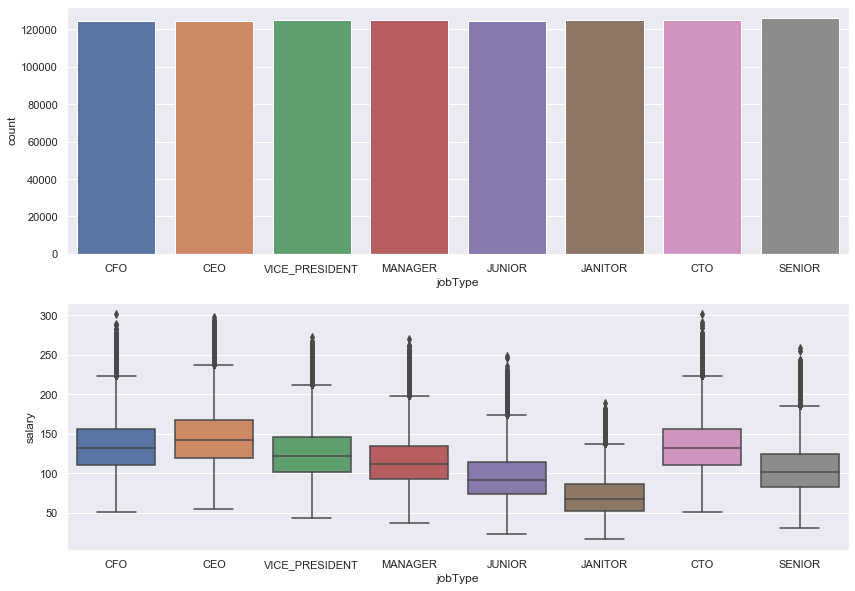

In [33]:
feature_plot(train_data, 'salary','jobType')

WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


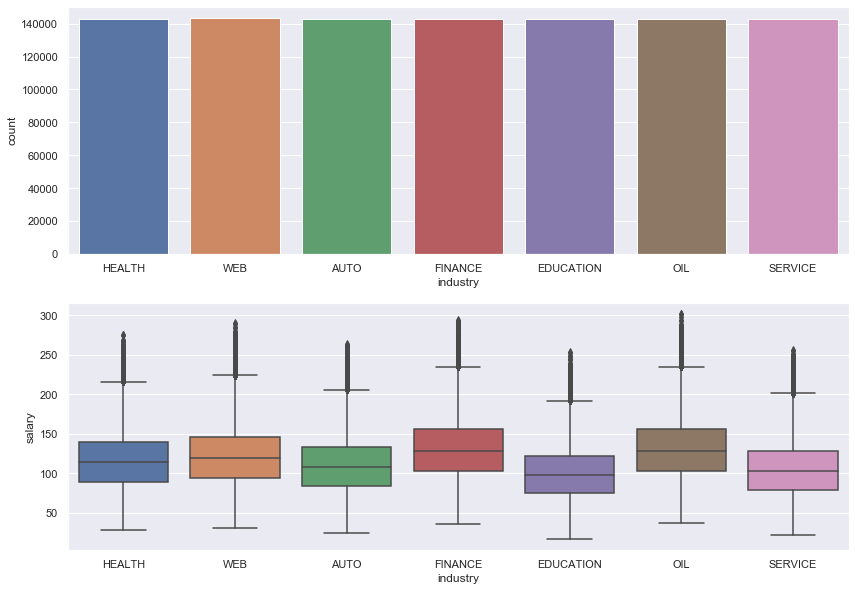

In [34]:
feature_plot(train_data, 'salary','industry')

NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64


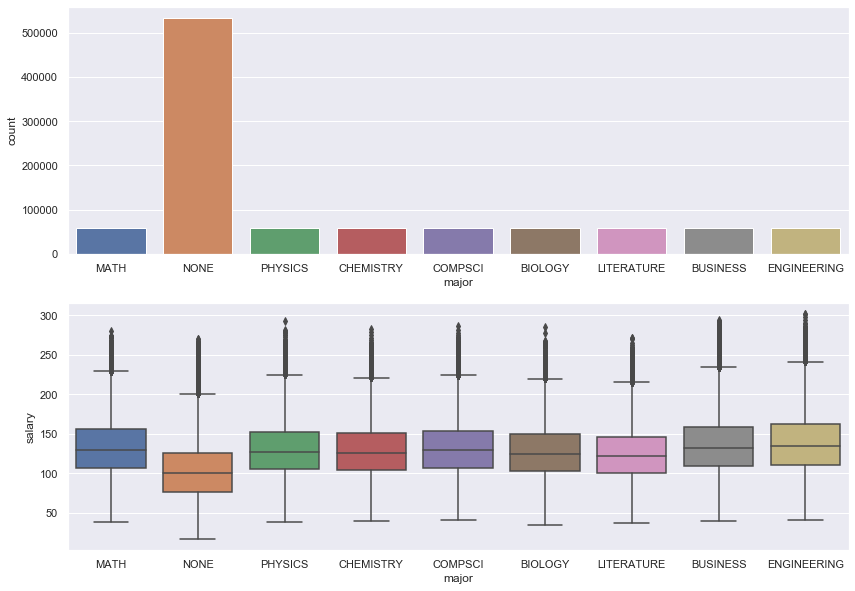

In [35]:
feature_plot(train_data, 'salary','major')

HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64


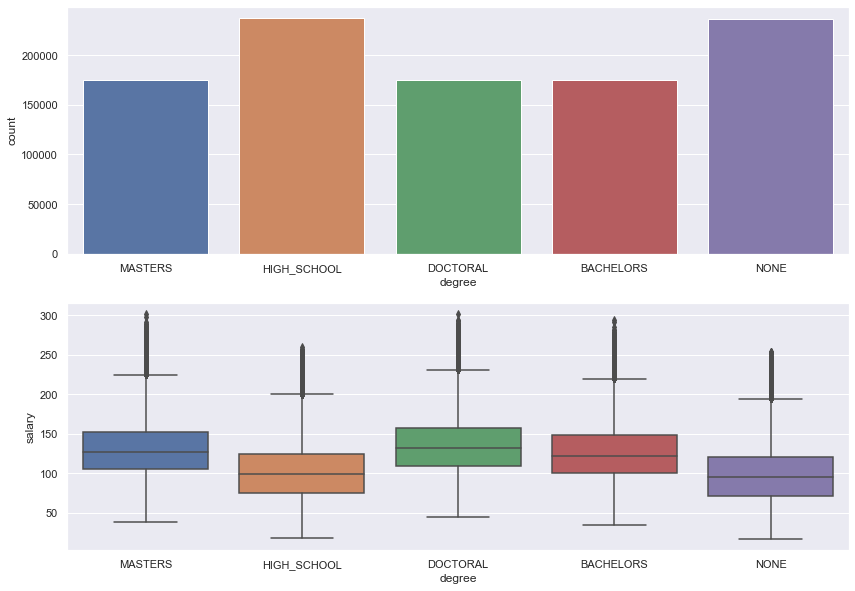

In [36]:
feature_plot(train_data, 'salary','degree')

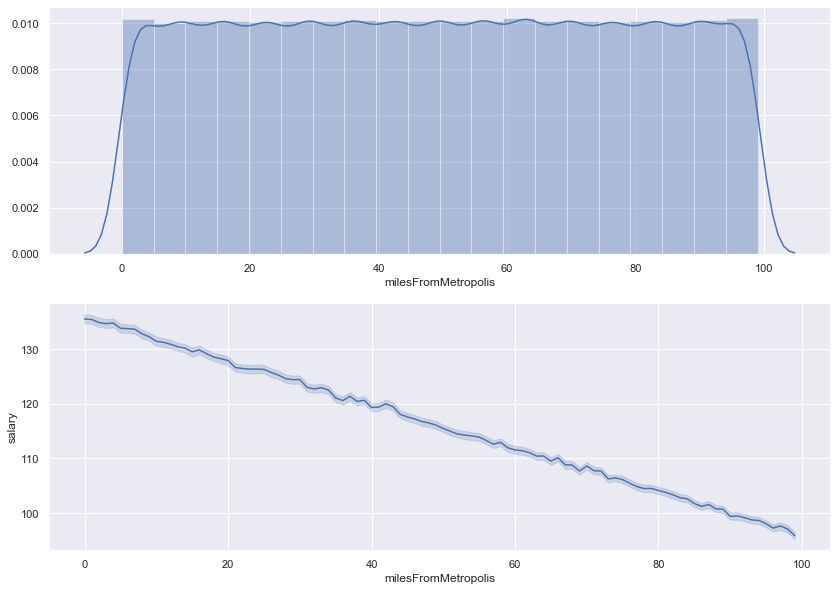

In [37]:
feature_plot(train_data,'salary','milesFromMetropolis')

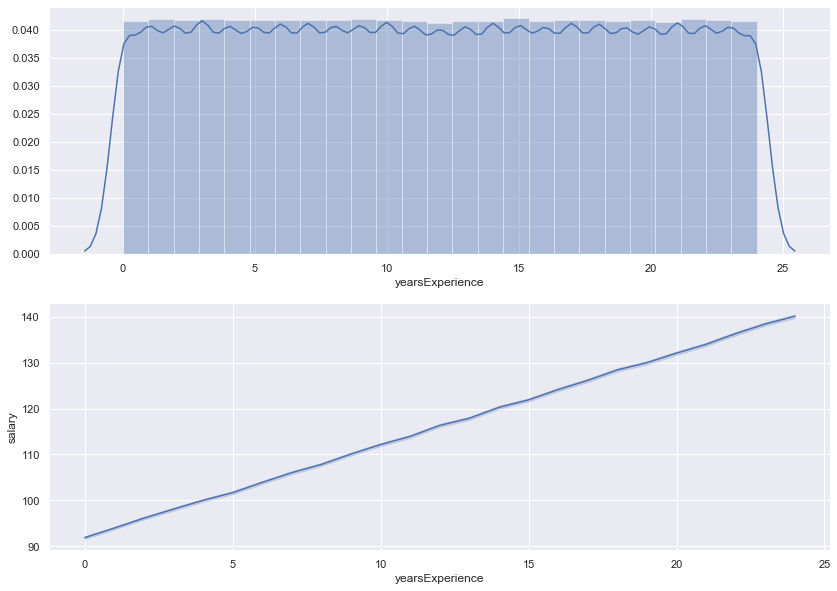

In [38]:
feature_plot(train_data, 'salary','yearsExperience')

In [39]:
train_data.drop('jobId', axis=1, inplace=True)
train_data.drop('companyId', axis=1, inplace=True)

train_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


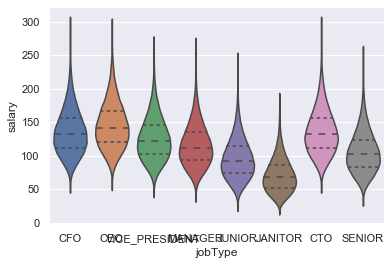

In [40]:
sns.violinplot(x='jobType', y='salary', data=train_data, scale='count', inner='quartile')

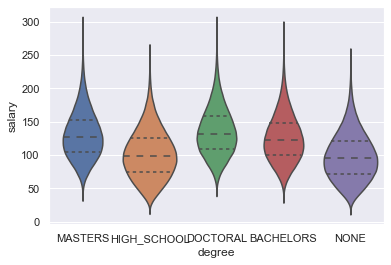

In [41]:
sns.violinplot(x='degree', y='salary', data=train_data, scale='count', inner='quartile')

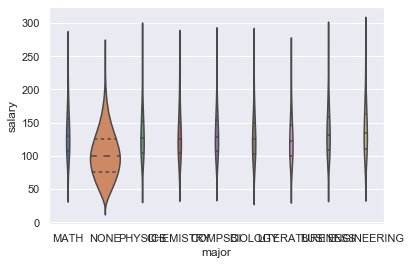

In [42]:
sns.violinplot(x='major', y='salary', data=train_data, scale='count', inner='quartile')

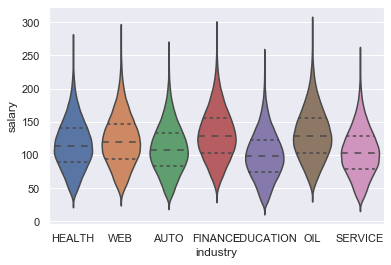

In [43]:
sns.violinplot(x='industry', y='salary', data=train_data, scale='count', inner='quartile')

In [44]:
train_data.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000672,0.375013
milesFromMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


# Job Types

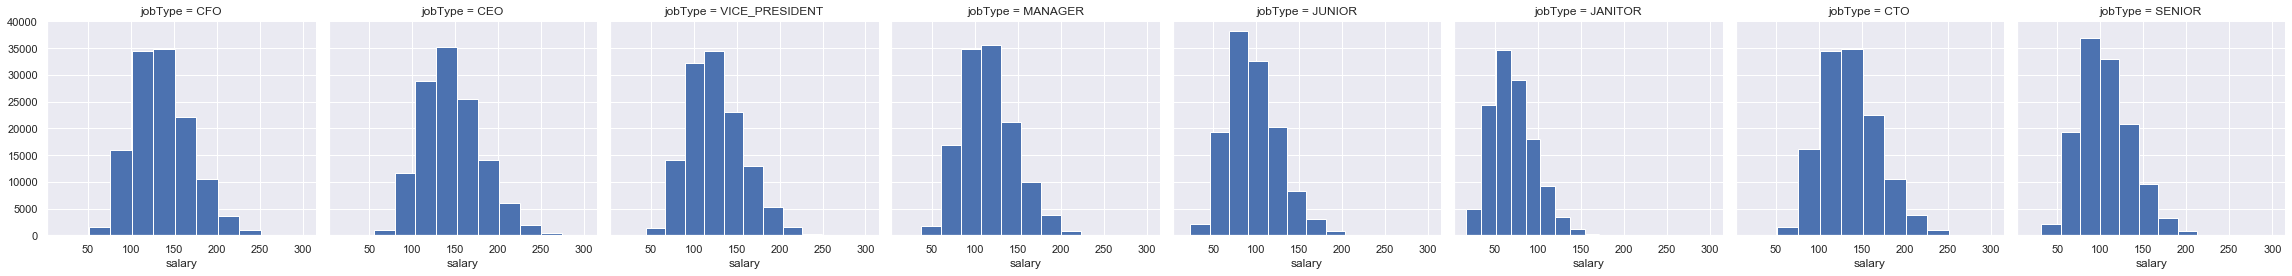

In [45]:
job = sns.FacetGrid(train_data, col='jobType', height=4)
job = job.map(plt.hist, 'salary', bins=10)

There are 8 types of job: CEO, CFO, CTO, JANITOR, JUNIOR, MANAGER, SENIOR and VICE_PRESIDENT.

It's reasonable to assume the chief positions offers much higher than JANITOR and JUNIOR. But will it be linear increase? Or exponential? Let's check the statistics

In [46]:
# The percentage of each of the job titles in the dataset
(train_data.jobType.value_counts()/len(train_data))*100

SENIOR            12.588663
VICE_PRESIDENT    12.523463
MANAGER           12.512063
CTO               12.504563
JANITOR           12.497162
CEO               12.477862
JUNIOR            12.459262
CFO               12.436962
Name: jobType, dtype: float64

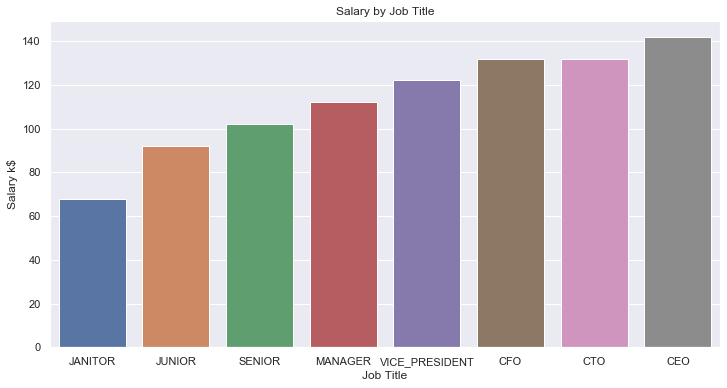

In [47]:
# Median salary by Job Title
rcParams['figure.figsize'] = 12, 6
sns.barplot(x='jobType', 
            y='salary',
            data=train_data.groupby(['jobType'])['salary'].median().reset_index().sort_values(by='salary'))
plt.title('Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary k$')
plt.show()

In [48]:
def show_statistics_and_boxplot(feature):
    # statistics
    print(train_data.groupby([feature]).salary.describe().sort_values(by='mean', ascending=False))
    
    # boxplot
    train_data[[feature, 'salary']].boxplot(by=feature)

                   count        mean        std   min    25%    50%    75%  \
jobType                                                                      
CEO             124778.0  145.311425  34.423846  55.0  120.0  142.0  167.0   
CTO             125045.0  135.481067  33.090947  51.0  111.0  132.0  156.0   
CFO             124369.0  135.458547  33.069203  51.0  111.0  132.0  156.0   
VICE_PRESIDENT  125234.0  125.368630  31.956295  44.0  102.0  122.0  146.0   
MANAGER         125120.0  115.368518  30.833865  37.0   93.0  112.0  135.0   
SENIOR          125886.0  105.487775  30.069722  31.0   83.0  102.0  124.0   
JUNIOR          124592.0   95.333087  29.246759  23.0   74.0   92.0  114.0   
JANITOR         124971.0   70.813045  24.643021  17.0   52.0   68.0   86.0   

                  max  
jobType                
CEO             298.0  
CTO             301.0  
CFO             301.0  
VICE_PRESIDENT  272.0  
MANAGER         270.0  
SENIOR          258.0  
JUNIOR          248.0  
JAN

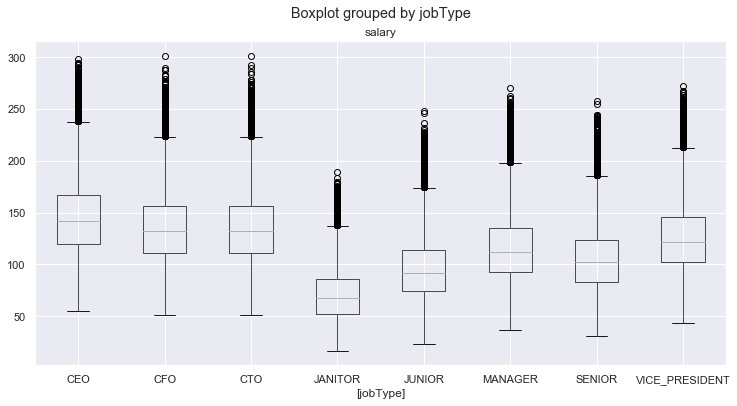

In [49]:
show_statistics_and_boxplot('jobType')

Looks like there's some rules to follow:

Jobs are evenly distributed. Each job type has 124,000~126,000 sample

The spectrum of average salary is the widest among all featuers

Average salary ranges from 145 to 70

CFO and CTO offer same salary and have same distribution

The average salary ranking is: CEO > CFO = CTO > VP > MANAGER > SENIOR > JUNIOR >> JANITOR

The deviation decreases with average salary

All positions are slightly positive skewed Gaussian distribution.

Some data transformation is needed to emphasize the rules in jobType vs. salary.

To visualize more on the skewness, use histograms, skewness, and number of outliers|:

In [50]:
def show_hist_skewness_outliers(feature, plotsize):
    features = train_data[feature].unique()
    plt.figure(figsize = (14, 6))

    # print histogram
    for i in range(len(features)):
        plt.subplot(plotsize[0], plotsize[1], i+1)
        plt.hist(train_data.salary[train_data[feature] == features[i]])
        plt.title(features[i])
    plt.show()
    
    # show skewness
    print(train_data.groupby([feature]).salary.skew().sort_values(ascending=False))
    
    # show number of outliers
    Q1 = train_data.groupby([feature]).salary.quantile(0.25)
    Q3 = train_data.groupby([feature]).salary.quantile(0.75)
    upper_bound = Q3 + 1.5 * (Q3 - Q1)
    outliers = train_data.groupby([feature]).apply(lambda x: (x.salary.values > upper_bound[x[feature]]).sum())
    print(outliers.sort_values(ascending=False))

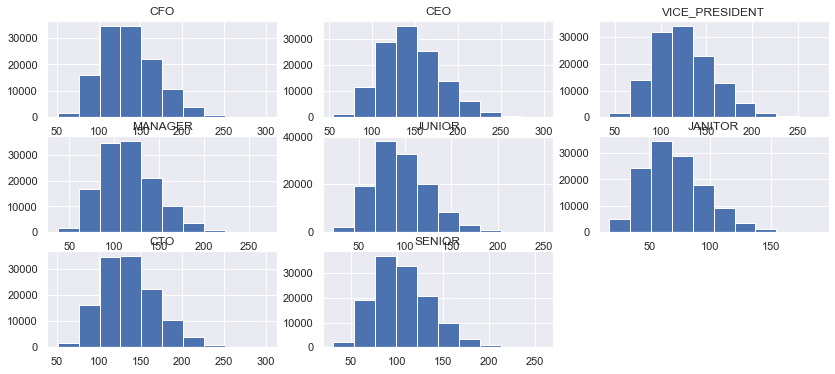

jobType
JANITOR           0.633856
JUNIOR            0.593662
SENIOR            0.555557
MANAGER           0.551669
VICE_PRESIDENT    0.527337
CFO               0.515281
CTO               0.512361
CEO               0.491217
Name: salary, dtype: float64
jobType
JANITOR           1365
SENIOR            1330
JUNIOR            1285
CFO               1234
CTO               1211
MANAGER           1192
CEO               1134
VICE_PRESIDENT    1074
dtype: int64


In [51]:
show_hist_skewness_outliers('jobType', (3,3))

This backs up our previous assumption of positive skewness. As shown in skew table, the skewness are all positive and relatively small, and most histograms slightly lean toward left. In addition, with lower position, skewness and outliers increases.

My guessing would be that lower positions usually have more room to negotiate for more salary due to other factors, such as world class company might offer more for the same position than local startups, or people with prior experience in the industry tends to be offered more than university graduates. And people interviewing for higher position might not be for the money, so the positions tends to offer standard salary. Thus the salaries for lower positions seems to rely more on other features than higher positions.

# Degree


There are 5 types of degree: BACHLORS, DOCTORAL, HIGH_SCHOOL, MASTERS, and NONE

I expect that more professional position asks for higher education, so jobs requiring DOCTORAL degree might offer much higher than HIGH SCHOOL graduated. But will it be the same for DOCTORAL vs. MASTER degree? How much of a gap in salary will it be?

                count        mean        std   min    25%    50%    75%    max
degree                                                                        
DOCTORAL     175362.0  135.490979  35.790555  45.0  109.0  132.0  158.0  301.0
MASTERS      175310.0  130.505647  35.399830  38.0  105.0  127.0  153.0  301.0
BACHELORS    175495.0  125.454663  35.042720  35.0  100.0  122.0  148.0  294.0
HIGH_SCHOOL  236975.0  101.921085  36.112684  18.0   75.0   99.0  125.0  260.0
NONE         236853.0   98.176882  34.915141  17.0   72.0   95.0  121.0  254.0


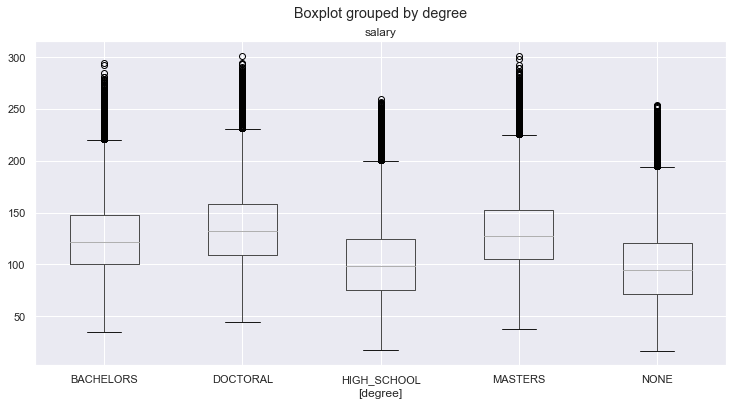

In [52]:
show_statistics_and_boxplot('degree')

Observations:

Number of jobs not asking for a degree is almost the same as asking for HIGH_SCHOOL degree.

Number of jobs asking for BACHELORS, MASTERS, and DOCTORAL are almost the same.

Jobs asking for HIGH_SCHOOL degree offer almost the same salary as NONE.

Jobs asking for HIGH_SCHOOL degree or NONE offer much less than BACHELORS and above.

Distribution for BACHELORS, MASTERS, and DOCTORAL shifts and narrows in same rate.

The average salary ranking is: DOCTORAL > MASTERS > BACHELORS >> HIGH_SCHOOL > NONE.
    
Except HIGH_SCHOOL, the ranking of deviation is the same as average salary

HIGH_SCHOOL has highest deviation

Maybe some jobs are intern positions that allow students to continue higher education while working, thus the salary is negotiable judging from their potential

Maybe other jobs are general labor jobs that don't require any professional knowledge, thus paid less

All degree are Gaussian distributed. And maybe positively skewed.

Looks like data can be seperated to two groups:

NONE and HIGH_SCHOOL: more job opening but lower offer
    
BACHELORS, MASTERS, DOCTORAL: less job openings and higher offer
    
Use average salary as encoder can emphasize this finding.

Again, let's verify the Gaussian distribution with histograms, skewness, and outliers.



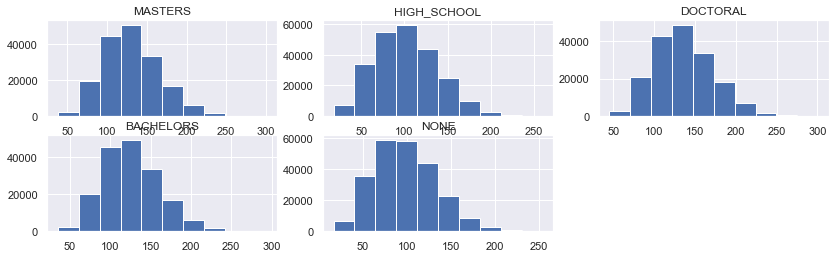

degree
MASTERS        0.467885
NONE           0.464882
BACHELORS      0.461798
DOCTORAL       0.456671
HIGH_SCHOOL    0.413297
Name: salary, dtype: float64
degree
NONE           1724
HIGH_SCHOOL    1632
MASTERS        1572
DOCTORAL       1537
BACHELORS      1440
dtype: int64


In [53]:
show_hist_skewness_outliers('degree', (3,3))

As expected, it's Gaussian and positive skewed.

It's interesting how HIGH_SCHOOL degree is skewed the least but at the same time has so many outliers, it's also offered second to least, suggesting that jobs requiring HIGH_SCHOOL have narrower spectrum of salary in general compare to other degrees.

# Major

There are 9 majors: BIOLOGY, BUSINESS, CHEMISTRY, COMPSCI (computer science), ENGINEERING, LITERATURE, MATH, NONE, and PHYSICS

I expect the technical (ENGINEERING and COMPSCI) and BUSINESS major might be offered more than pure science (BIOLOGY, CHEMISTRY, MATH, PHYSICS) and LITERATURE major since they're more practical (eg. designing product, analyzing market trend, etc.) and less theoratical or economic (eg. research papers, studying Shakespeare, etc.).

In [54]:
train_data.groupby(['major']).size()

major
BIOLOGY         58379
BUSINESS        58518
CHEMISTRY       58875
COMPSCI         58382
ENGINEERING     58594
LITERATURE      58684
MATH            57800
NONE           532353
PHYSICS         58410
dtype: int64

This features has noticable imbalanced data. More than half of the job offerings don't look at applicant's major (NONE), hance everyone can apply. But this raises some questions:

Does it reflect on salary?

If the major is irrelevent, do those jobs have lower wage because it's not professional?

For example, workers at warehouse or clark at supermarket might not need be any major to work.

Does it suggest us that the major doesn't provide valueable information since so many jobs don't require any?

Drop this feature?

Merge it with other features?

Any relationship with other features?

For example, are OLD and SERVICE industry willing to hire more NONE major employees than WEB or FINANCE?

For example, is employee likely to be paid more with higher education in any major?

Some questions call for correlation matrix that will be shown later. Let's check the statistics report first.

                count        mean        std   min    25%    50%    75%    max
major                                                                         
ENGINEERING   58594.0  138.441342  38.178934  41.0  111.0  135.0  163.0  301.0
BUSINESS      58518.0  135.648980  37.006526  40.0  109.0  132.0  159.0  294.0
MATH          57800.0  133.322042  35.539246  39.0  107.0  130.0  156.0  280.0
COMPSCI       58382.0  132.075605  34.776640  41.0  107.0  129.0  154.0  286.0
PHYSICS       58410.0  130.372436  34.956981  38.0  105.0  127.0  153.0  293.0
CHEMISTRY     58875.0  129.072085  34.832396  40.0  104.0  126.0  151.0  282.0
BIOLOGY       58379.0  127.932664  34.820141  35.0  103.0  125.0  150.0  285.0
LITERATURE    58684.0  124.423097  33.576413  37.0  100.0  122.0  146.0  271.0
NONE         532353.0  102.583864  36.136268  17.0   76.0  100.0  126.0  270.0


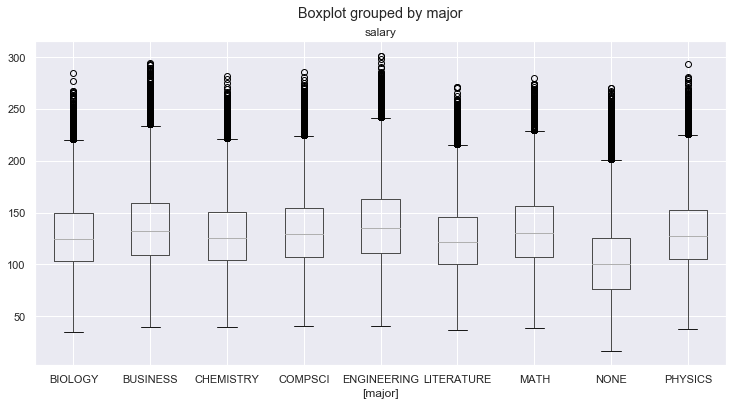

In [55]:
show_statistics_and_boxplot('major')

NONE obviously has lower distribution than others by great amount.

The average salary ranking is: ENGINEERING > BUSINESS > MATH > COMPSCI > PHYSICS > CHEMISTRY > BIOLOGY > LITERATURE >> NONE

BUSINESS and ENGINEERING have larger deviation

LITERATURE has smallest deviation

Ranking of deviation is similar to mean, except NONE has higher deviation

Lower paid jobs usually offers the standard salary

Higher paid jobs depends more on other factors, thus have wider range of salary

There can be various jobs that don't require any major, thus it also heavily depends on other features

Gaussian distributed and skew to positive

This verifies our initial guessing that jobs with no major requirement might be less professional and thus paid less. But consider the imbalanced data, it's too early to assume all jobs not requiring major pay less since we're not sure if there are other factors influencing the salary. More details in correlation matrix later.

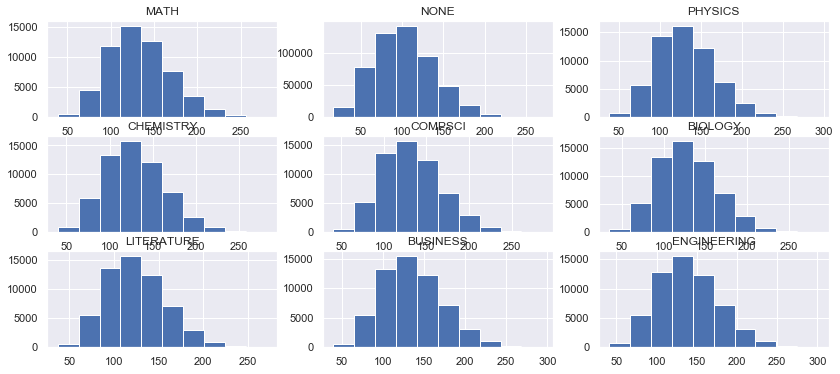

major
BUSINESS       0.458121
COMPSCI        0.453416
LITERATURE     0.446777
PHYSICS        0.443727
MATH           0.437128
ENGINEERING    0.430201
CHEMISTRY      0.429862
BIOLOGY        0.422435
NONE           0.421679
Name: salary, dtype: float64
major
NONE           3760
COMPSCI         532
CHEMISTRY       525
BIOLOGY         522
BUSINESS        518
MATH            470
LITERATURE      468
ENGINEERING     468
PHYSICS         462
dtype: int64


In [56]:
show_hist_skewness_outliers('major', (3,3))

Compare to other features like jobType, all majors are skewed at similar rate. Notice that NONE has many outliers, but considering half of data requires NONE, the distribution is evened out and thus doesn't skew that much.

# Industry

There are 7 types of industry: AUTO (automobile), EDUCATION, FINANCE, HEALTH, OIL, SERVICE, and WEB

I expect FINANCE and WEB pays relatively higher and SERVICE pays lower.



              count        mean        std   min    25%    50%    75%    max
industry                                                                    
OIL        142770.0  130.953863  38.528558  37.0  103.0  128.0  156.0  301.0
FINANCE    142866.0  130.747659  38.319820  36.0  103.0  128.0  156.0  294.0
WEB        143205.0  121.645362  38.165659  31.0   94.0  119.0  146.0  290.0
HEALTH     142755.0  115.735540  36.865179  28.0   89.0  114.0  140.0  275.0
AUTO       142941.0  109.435222  36.091590  25.0   84.0  108.0  133.0  264.0
SERVICE    142639.0  104.446820  35.577606  22.0   79.0  103.0  128.0  256.0
EDUCATION  142819.0   99.448386  35.110257  17.0   75.0   98.0  122.0  253.0


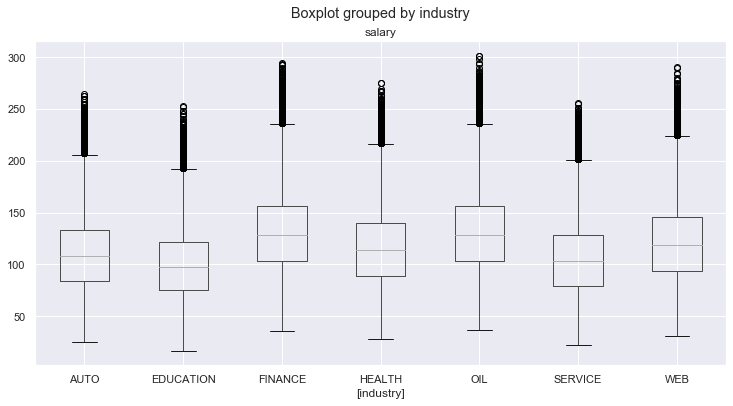

In [57]:
show_statistics_and_boxplot('industry')

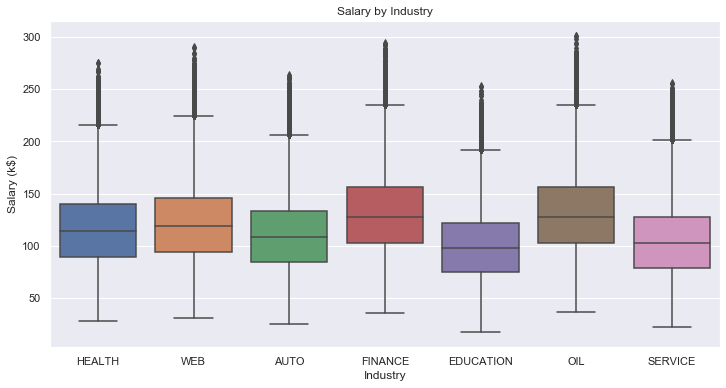

In [58]:
# Avg salary by industry
sns.boxplot(x='industry',
            y='salary',
            data = train_data)
plt.xlabel('Industry')
plt.ylabel('Salary (k$)')
plt.title("Salary by Industry")
plt.show()

Findings:

Each industry has around 142,800 openings.

FINANCE and OIL(!) have highest wage and most stretched deviation

FINANCE and OIL have the same distribution

The ranking of average salary is: FINANCE = OIL > WEB > HEALTH > AUTO > SERVICE > EDUCATION
    
The ranking of deviation is the same as average salary

There's a significant drop between WEB and HEALTH

Is there any relationship between group:(OIL, FINANCE, WEB) and group:(HEALTH, AUTO, SERVICE, EDUCATION)?
        
Gaussian distribution and positive skew

Let's look at the salary histograms and other details.

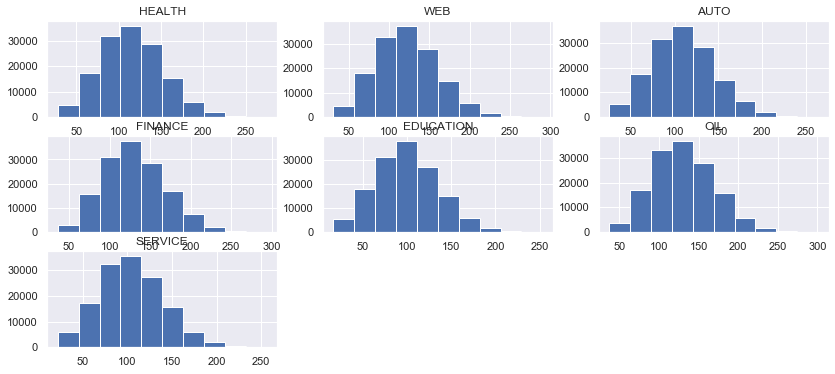

industry
OIL          0.358658
WEB          0.347584
FINANCE      0.344985
AUTO         0.322708
HEALTH       0.321032
SERVICE      0.315017
EDUCATION    0.304198
Name: salary, dtype: float64
industry
EDUCATION    1070
WEB          1024
OIL           940
AUTO          916
FINANCE       867
SERVICE       859
HEALTH        830
dtype: int64


In [59]:
show_hist_skewness_outliers('industry', (3,3))

The skewness is smallest in all features. Similar to the deviations, there's a gap in skewness between group:(OIL, WEB, FINANCE) and group:(AUTO, HEALTH, SERVICE, EDUCATION). EDUCATION is the least skewed but has most outliers, suggesting that most positions offer merket standard salary and has narrower salary spectrum.

# Years of Experience

Span from 0 to 24 years. Let's select a few and see their distributions.

I expect the more years of experience a job asks, the more it pays. But is there a plateau? Is the relationship linear?

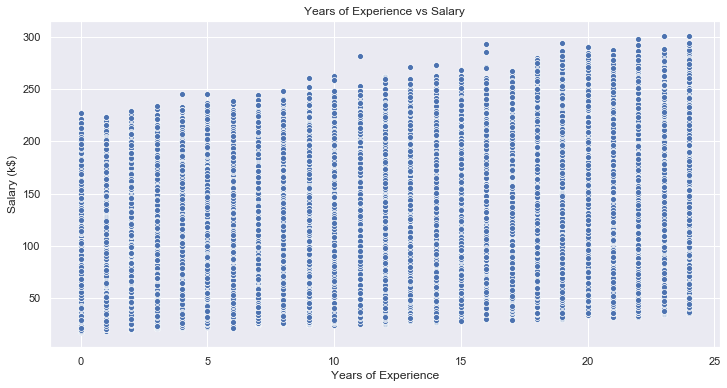

In [60]:
# Relationship between salary and years of experience
sns.scatterplot(x='yearsExperience',
                y='salary',
                data=train_data)

plt.xlabel("Years of Experience")
plt.ylabel("Salary (k$)")
plt.title("Years of Experience vs Salary")
plt.show()

As expected:

The yearsExperience and average salary have linear relationship

The deviation increases with average salary

Gaussian distribution and positive skew

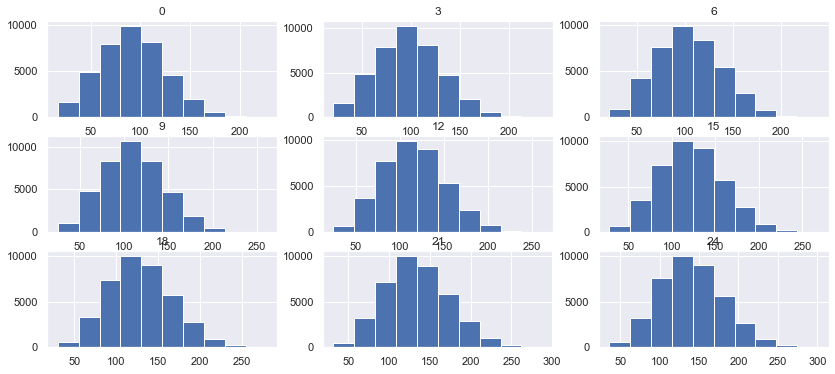

yearsExperience
0     0.231537
3     0.258000
6     0.240253
9     0.246936
12    0.288033
15    0.267977
18    0.275861
21    0.283041
24    0.298347
Name: salary, dtype: float64

In [61]:
years= np.arange(0, 24+1, 3)
plt.figure(figsize = (14, 6))

for i in range(len(years)):
    plt.subplot(3, 3, i+1)
    plt.hist(train_data.salary[train_data.yearsExperience == years[i]])
    plt.title(years[i])
plt.show()

train_data.groupby(['yearsExperience']).salary.skew()[years]

The skewness is the smallest of all features and skews at similar rate. Overall, the skewness increases with yearsExperience.

And to show the linear relationship, here's the plot of yearsExperience vs. average salary.

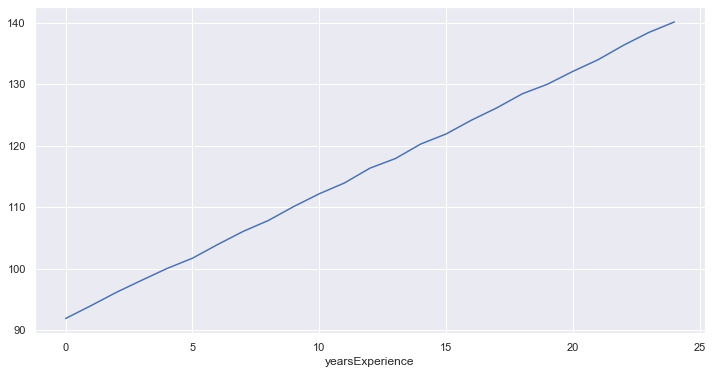

In [62]:
# plot yearsExperience vs salary
train_data.groupby(['yearsExperience']).salary.mean().plot(x='yearsExperience', y='salary')

It's a slope of 2 and offset 90 linear relationship, thus we can assume yearsExperience is an independent feature.

# Miles from metropolis

Span from 0 to 99 miles. Like yearsExperience, let's select a few and see their distributions.

I expect companies having offices in metropolis are likely to have higher net worth, thus the closer to metropolis, the more it pays. Again, is there a plateau? Is the relationship linear?



In [63]:
def group_values(feature, values):
    first_one = True
    for value in values:
        if first_one:
            groups = train_data[[feature, 'salary']][train_data[feature] == value]
            first_one = False
        else:
            group = train_data[[feature, 'salary']][train_data[feature] == value]
            groups = pd.concat([groups, group], axis=0)
    return groups

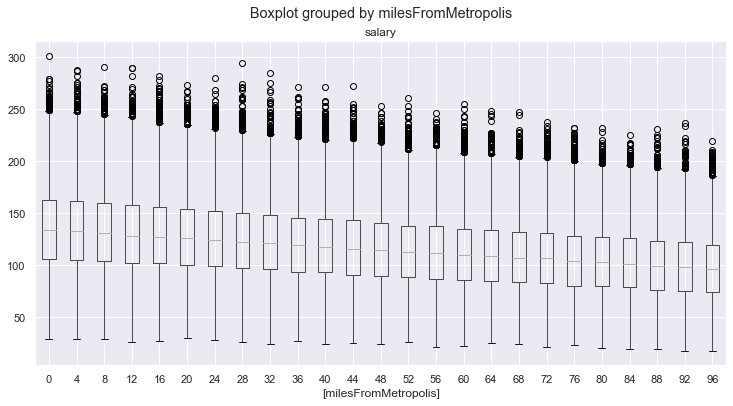

In [64]:
# select random miles
miles= np.arange(0, 99+1, 4)
sorted_miles = group_values('milesFromMetropolis', miles)
sorted_miles.boxplot(by='milesFromMetropolis')
plt.show()

As expected:

The yearsExperience and average salary have linear relationship

The deviation increases with average salary

Gaussian distribution and positive skew

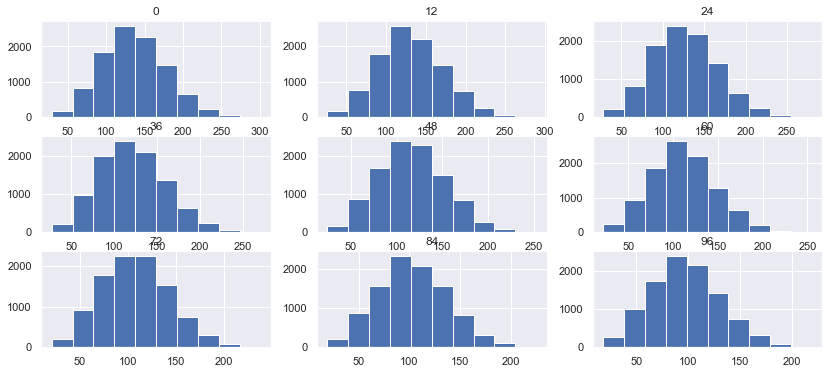

milesFromMetropolis
0     0.264081
12    0.281166
24    0.287610
36    0.309703
48    0.233456
60    0.269848
72    0.237811
84    0.230667
96    0.271811
Name: salary, dtype: float64

In [65]:
miles= np.arange(0, 99+1, 12)
plt.figure(figsize = (14, 6))

# plot histograms
for i in range(len(miles)):
    plt.subplot(3, 3, i+1)
    plt.hist(train_data.salary[train_data.milesFromMetropolis == miles[i]])
    plt.title(miles[i])
plt.show()

train_data.groupby(['milesFromMetropolis']).salary.skew()[miles]

The skewness is the small among all features and skews at similar rate. There's no obvious relationship between skewness and and milesFromMetropolis.

And to show the linearity, here's the plot of milesFromMetropolis vs. average salary.

,count,mean,std,min,25%,50%,75%,max
milesFromMetropolis,,,,,,,,
0,10123.0,135.571175,41.096969,29.0,106.0,134.0,163.0,301.0
12,10016.0,130.950280,40.342749,26.0,102.0,128.0,158.0,289.0
24,9854.0,126.403694,39.099303,28.0,99.0,124.0,152.0,280.0
36,10000.0,120.623000,38.141179,27.0,93.0,119.0,145.0,271.0
48,10104.0,116.520487,36.593978,24.0,90.0,115.0,141.0,253.0
60,10018.0,111.563985,35.812409,22.0,86.0,110.0,135.0,255.0
72,10063.0,107.671668,35.004482,21.0,83.0,107.0,131.0,238.0
84,9947.0,102.600885,34.047470,19.0,79.0,101.0,126.0,225.0
96,10090.0,97.224579,33.063803,18.0,74.0,96.0,119.0,219.0


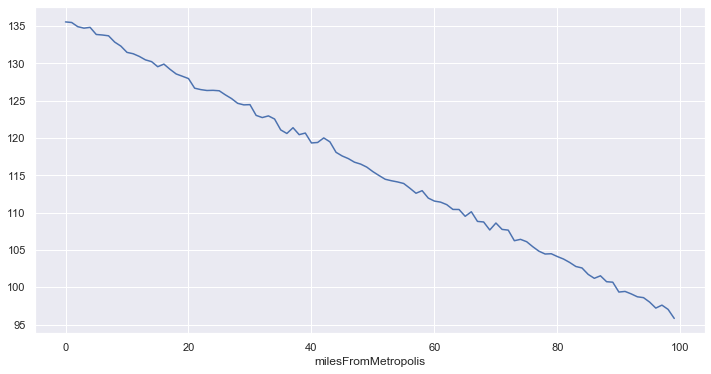

In [66]:
# select random miles and show statistics
miles= np.arange(0, 99+1, 12)
sorted_miles = group_values('milesFromMetropolis', miles)
display(sorted_miles.groupby(['milesFromMetropolis']).salary.describe())

# show milesFromMetropolis vs salary
train_data.groupby(['milesFromMetropolis']).salary.mean().plot(x='milesFromMetropolis', y='salary')

The lins has slope of -0.4 and offset 135.

Similar to yearsExperience, milesFromMetropolis is an independent feature, Gaussian distributed, and has (reversed) linear pattern.

# EDA Conclusion


All features are Gaussian distributed and positive skewness

Higher average salary often pairs with wider distribution (larger deviation)

companyId has weak association with salary
Has smallest salary variance
Correlation with other features might be low, too


jobType has strong correlation with salary
Has highest salary variance: avearage salary ranges from 145 to 70
    
    
degree has strong correlation with salary
BACHELORS or advanced degree have much higher salary than HIGH_SCHOOL and NONE
Can potentially be split to two groups:
NONE and HIGH_SCHOOL: more job opening but lower salary
BACHELORS, MASTERS, DOCTORAL: less job openings and higher salary
    
    
    
major: ENGINEERING and BUSINESS major offer the most, then science majors, and LITERATURE and NONE offer the lowest
Has imbalanced data: more than half of training set don't require a major
    
    
industry: FINANCE and OIL offer the most
Has smallest skew rate
Correlation with salary might be moderate or low


companyId, jobType, degree, major, and industry are not independent features
Consider adding group statistics as features to strenthen the feature dependencies
Consider adding new feature(s) indicating the outlier upper boundry

More yearsExperience is offered more salary


Less milesFromMetropolis is offered more salary


yearsExperience and milesFromMetropolis are independent and linearly related to salary
Though salary is linearly associated with these two features, consider converting to mean salary so they have the similar scale as salary and other features



All categories have outliers but in reasonable range and number, so I won't consider removing them.


Model selection
For model selection, I'll select few regression models and few ensemble models:

For regression models, I'll try the basic LinearRegrerssion model. And since the features aren't too diverse, I'm guessing the model shouldn't be too complicated, thus it's not necessary to penalize the model complexity. I'll use Lasso and ElesticNet modelto check my hypothesis, and I expect no dramatic improvement. I won't consider KNN or SVM because those models will take too much time to train with our data size. And definitely DecisionTreeRegressor tree model because our data seems simple enough for binary spliting.

Although ensemble models take long time to train, they're very powerful models. I'll try ensemble tree model such as RandomForestRegressor and ExtraTreeRegressor and boosting models such as AdaBoostRegressor and GradientBoostingRegressor.

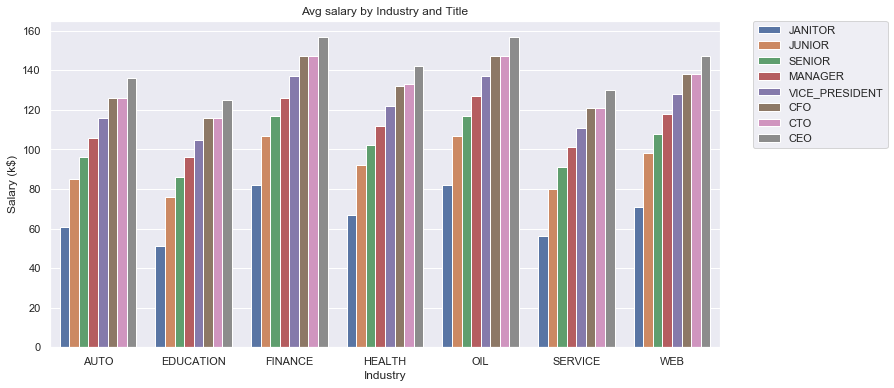

In [68]:
# Avg. Salary by Industry and Title
sns.barplot(x='industry',
            y='salary',
            hue='jobType',
            data=train_data.groupby(['industry', 
                                        'jobType'])['salary'].median().reset_index().sort_values(['industry',
                                                                                                  'salary'], ascending=True))
plt.xlabel('Industry')
plt.ylabel('Salary (k$)')
plt.title('Avg salary by Industry and Title')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

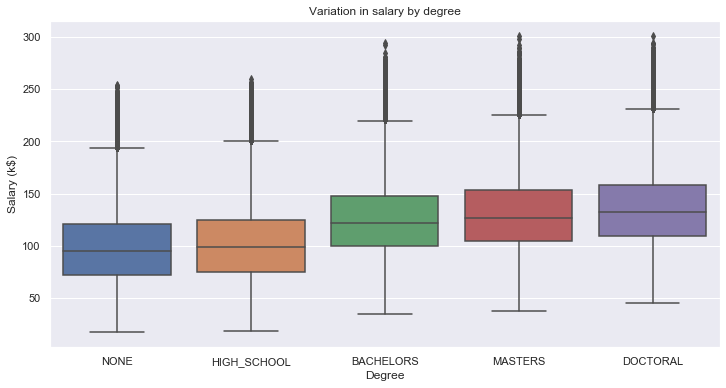

In [69]:
# How important is having a degree to be earning more?
sns.boxplot(x='degree',
            y='salary',
            data = train_data,
            order = ["NONE", "HIGH_SCHOOL", "BACHELORS", "MASTERS", "DOCTORAL"])
plt.xlabel('Degree')
plt.ylabel('Salary (k$)')
plt.title('Variation in salary by degree')
plt.show()

In [70]:
# How important is having a degree to be earning more?
train_data.degree.value_counts()/ len(train_data)*100

HIGH_SCHOOL    23.697618
NONE           23.685418
BACHELORS      17.549588
DOCTORAL       17.536288
MASTERS        17.531088
Name: degree, dtype: float64

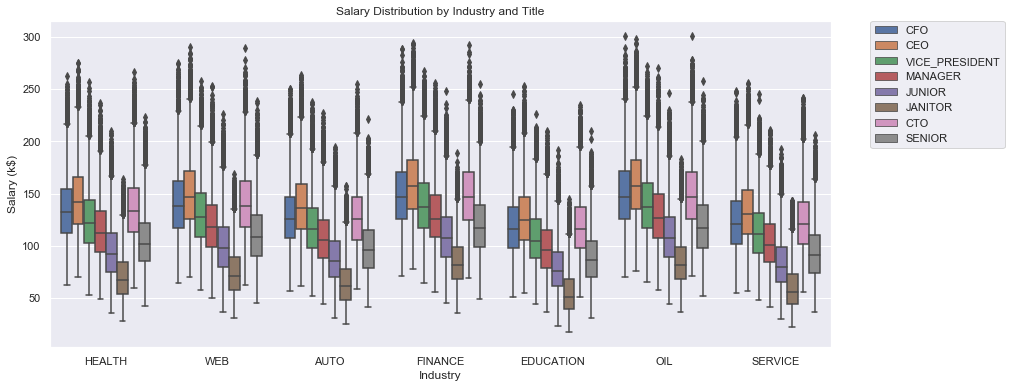

In [71]:
# Distribution of pay by industry and title
rcParams['figure.figsize'] = 14, 6
sns.boxplot(x='industry',
            y='salary',
            hue='jobType',
            data=train_data)
plt.title('Salary Distribution by Industry and Title')
plt.xlabel('Industry')
plt.ylabel('Salary (k$)')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

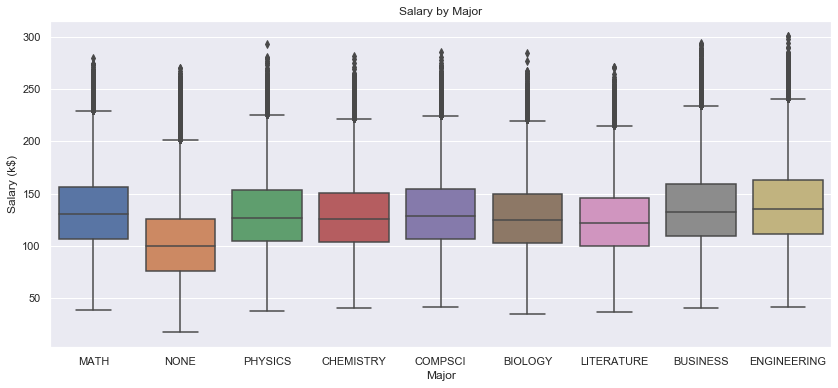

In [72]:
#Do a particular major grads earn more as compared to the others?
sns.boxplot(x='major',
            y='salary',
            data=train_data)
plt.xlabel('Major')
plt.ylabel('Salary (k$)')
plt.title('Salary by Major')
plt.show()

# Studying the outliers

In [73]:
# for Salary

stat = train_data['salary'].describe()
IQR = stat['75%'] - stat['25%']
upper_limit = stat['75%'] + 1.5 * IQR
lower_limit = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for salary are {} and {}'.format(upper_limit, lower_limit))



The upper and lower bounds for salary are 220.5 and 8.5


In [74]:
train_data[train_data.salary < lower_limit ]

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [75]:
train_data[train_data.salary > upper_limit ]

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,CTO,MASTERS,NONE,HEALTH,24,3,223
560,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,CEO,MASTERS,MATH,AUTO,23,9,240
719,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...
998511,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999244,CEO,NONE,NONE,OIL,17,10,223
999275,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999665,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [76]:
upper_outliers = train_data[train_data.salary > upper_limit ]
print(upper_outliers.shape)

(7117, 7)


In [77]:
upper_outliers.jobType.value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [78]:
def remove_extremes(Training_data, tune_param):
    '''Function to remove records which have less than x% of rows in a certain salary range'''
    
    rows_removed = 0
    Job_Types = Training_data.jobType.unique()
    
    for j in Job_Types:
        x = Training_data[Training_data.jobType==j]['salary'].count()
        for i in range(0, 100, 10):
            #identify records in the certain bin for jobType j
            y = Training_data[(Training_data.jobType == j) &
                (Training_data.salary >= np.percentile(Training_data.salary, i)) & 
                (Training_data.salary < np.percentile(Training_data.salary, (i+10)))]['salary'].count()

            if((y/x)*100 < tune_param):
                    # keep count of the number of rows removed
                    rows_removed = rows_removed + y

                    # eliminate the records
                    Training_data = Training_data.loc[~((Training_data.jobType == j)&
                                    (Training_data.salary >= np.percentile(Training_data.salary, i))&
                                    (Training_data.salary < np.percentile(Training_data.salary, (i+10)))),:]
    print(rows_removed)
    return(Training_data)

# Lets look for correlation between the features

In [ ]:
train_data['jobType'] = train_data['jobType'].astype('category')
train_data['industry'] = train_data['industry'].astype('category')
train_data['degree'] = train_data['degree'].astype('category')
train_data['major'] = train_data['major'].astype('category')
train_data.info()

# Hypothesis Solution

## Data Preparation

 Encode data:
    
Transform categorical values to numerical

Transform or scale yearsExperience and milesFromMetropolis to same scale as other features


Engineer features:
Group dependent features to emphesize dependencies

# Model selection

For model selection, I'll select few regression models and few ensemble models:


For regression models, I'll try the basic LinearRegrerssion model. And since the features aren't too diverse, I'm guessing the model shouldn't be too complicated, thus it's not necessary to penalize the model complexity. I'll use Lasso and ElesticNet modelto check my hypothesis, and I expect no dramatic improvement. I won't consider KNN or SVM because those models will take too much time to train with our data size. And definitely DecisionTreeRegressor tree model because our data seems simple enough for binary spliting.


Although ensemble models take long time to train, they're very powerful models. I'll try ensemble tree model such as RandomForestRegressor and ExtraTreeRegressor and boosting models such as AdaBoostRegressor and GradientBoostingRegressor.

## Encode Data

The goal is to transform our data according to certain rules to further reveal the hidden pattern.

First, we have to transform strings to meaningful numerical values. companyId, jobType, degree, major, and industry are categorical columns that need convertion. We have three options:

One-Hot Encoder: one of the common encoders
    
Categorical Encoder: one of the common encoders
    
Category Average Salary Encoder: use average salary of the category to encode categories
    
Let's try all three and use 50,000 samples for testing to see which method yields highest correlation with salary.

In [ ]:
def one_hot_encoder(train, features, test=pd.DataFrame()):
    for feature in features:
        categories = train[feature].unique()
        for category in categories:
            train[feature + "_" + category] = (train[feature] == category).astype(int)
            if test.any().any():
                test[feature + "_" + category] = (test[feature] == category).astype(int)
        train = train.drop(columns=feature)
        if test.any().any():
            test = test.drop(columns=feature)
            
    return train, test

In [ ]:
# because one-hot encoding 50,000 samples takes too long, use 5,000 samples instead

examples = 5000
example_set = train_data[:examples].copy()

# display data after encoding
display(one_hot_encoder(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId'])[0].head(5))

# show feature correlation with salary
show_corr = 30
one_hot_encoder(example_set, ['jobType', 'degree', 'major', 'industry', 'companyId'])[0].corr().salary.iloc[:show_corr]

One-Hot encoding is the standard way to transform strings to numericals, but it

Too many new features (95 columns)

Think of curse of dimensionality

Takes too much time to generate

Challenging for algorithm to understand

Thus, one-hot encoding isn't the ideal encoder in our case.

# Label Encoder

This method uses sklearn.preprocessing.LabelEncoder() to assign numerical values starting from 0.

In [ ]:
def categorical_encoder(train, features, test=pd.DataFrame()):
    encoder = LabelEncoder()
    for feature in features:
        train[feature] = encoder.fit_transform(train[feature])
        if test.any().any():
            test[feature] = encoder.transform(test[feature])

    return train, test

In [ ]:
from  sklearn.preprocessing import LabelEncoder

In [ ]:
example_set = train_data[:50000].copy()
features = ['jobType', 'degree', 'major', 'industry', 'companyId']

# display data after encoding
print(categorical_encoder(example_set, features)[0].head(5))

# show feature correlation with salary
correlation = categorical_encoder(example_set, features)[0].corr()
print(correlation['salary'])

# plot correlation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, vmin=-1, cmap="RdBu_r")

With Label Encoder:

No new feature

Except companyId and industry, other features have good correlation with salary

Except major and degree, other pairs of features are independent from each other

This approach looks promissing! Let's see if we can lift the perfomance up a notch with custom Categorical Encoder.

# Category Average Salary Encoder

This method uses the average salary to assign numerical values.

No 0: I don't want to confuse or deactivate any category with 0

Average salaries indicates the ranking of categories

Average salaries are the same scale as salary

Not only categorical columns, numerical columns (yearsExperience and milesFromMetropolis) can also be converted to average salary since there aren't many different unique numbers (0-24 years and 0-99 miles)

In [ ]:
def average_salary_encoder(train, features, test=pd.DataFrame()):
    for feature in features:
        salary_dict = dict(train.groupby([feature]).salary.mean())
        train[feature] = train[feature].map(salary_dict)
        if test.any().any():
            test[feature] = test[feature].map(salary_dict)

    return train, test

In [ ]:
example_set = train_data[:50000].copy()
features = ['jobType', 'degree', 'major', 'industry', 'companyId']

# display data after encoding
display(average_salary_encoder(example_set, features)[0].head(5))

# show feature correlation with salary
correlation = average_salary_encoder(example_set, features)[0].corr()
print(correlation.salary)

# plot correlation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, vmin=-1, cmap="RdBu_r")

From correlation matrix, we observe:

Correlation matrix of custom Label Encoder looks like correlation matrix of Label Encoder but better

Between Salary and other features, only companyId has low correlation with salary

Consider removing companyId
Between feature to feature, Major and Industry are highly correlated.

Consider merging Major and Industry to avoid possible noise

Between two features, pairs other than Major-Industry have low correlation, meaning two features are relatively independent from each other.

Thus makes it the plausible encoder for our case.

# Feature engineering 

Now we've selected our encoder, next is feature engineering. From the correlation matrix with average salary encoder, we see some potential options for feature selection:

Group dependent features

Drop companyId

Add statistical values

Remove outliers


# Lets create Models

Create multiple models and try scaling, tuning, and finally pick best model for prediction. We will use , RMSE ,MSE ,MAE, MAPE as performance metrics 

## Regression and Ensemble models 

Ensemble models performs better in general, and GradientBoostingRegressor performs the best. Besides GradientBoostingRegressor, pick couple other models that have low MSE: RandomForestRegressor, and LinearRegression. Tune hyperparameters and try other adjustments to improve performance.

## Grid Searching

Use grid search to find best hyperparameters

## Random Forest Regressor

Although MSE still decreases with n_estimators, but it'll take too long to train so I'm taking MSE=313.741 as best score from model RandomForestRegressor(n_estimators=200, max_depth=15, max_features=8).

## Gradient Boosting Regressor

In general:

n_estimators=100 < n_estimators=200 < n_estimators=50

loss='ls' MSE < loss='huber' MSE

max_depth=8 MSE < max_depth=15

And the best model is GradientBoostingRegressor(n_estimators=100, loss='ls', max_depth=8) with MSE=306.792, and also the best model compare to RandomForesetRegressor.



In [ ]:
train, test = feature_engineer(train_data.copy(), ['companyId', 'jobType', 'degree', 'major', 'industry'], 'CJDMI', test_df.copy())

model = GradientBoostingRegressor(n_estimators=100, loss='ls', max_depth=8)
model.fit(train.drop(columns='salary'), train.salary)
test_pred = model.predict(test).round(3)
test_final = pd.DataFrame(test_pred, index=test_df.index, columns=['salary'])
test_final.to_csv("test_salaries_prediction.csv")

In [ ]:
print("The mean squared error of our test set predicitons is:", mean_squared_error(test, test_pred))

# One Hot encoding for the categorical features n the training dataset

In [79]:
# One-hot encode categorical data in train_data dataset
train_data= pd.get_dummies(train_data)
train_data.head()

,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,73,101,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,10,38,137,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,8,17,142,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8,16,163,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


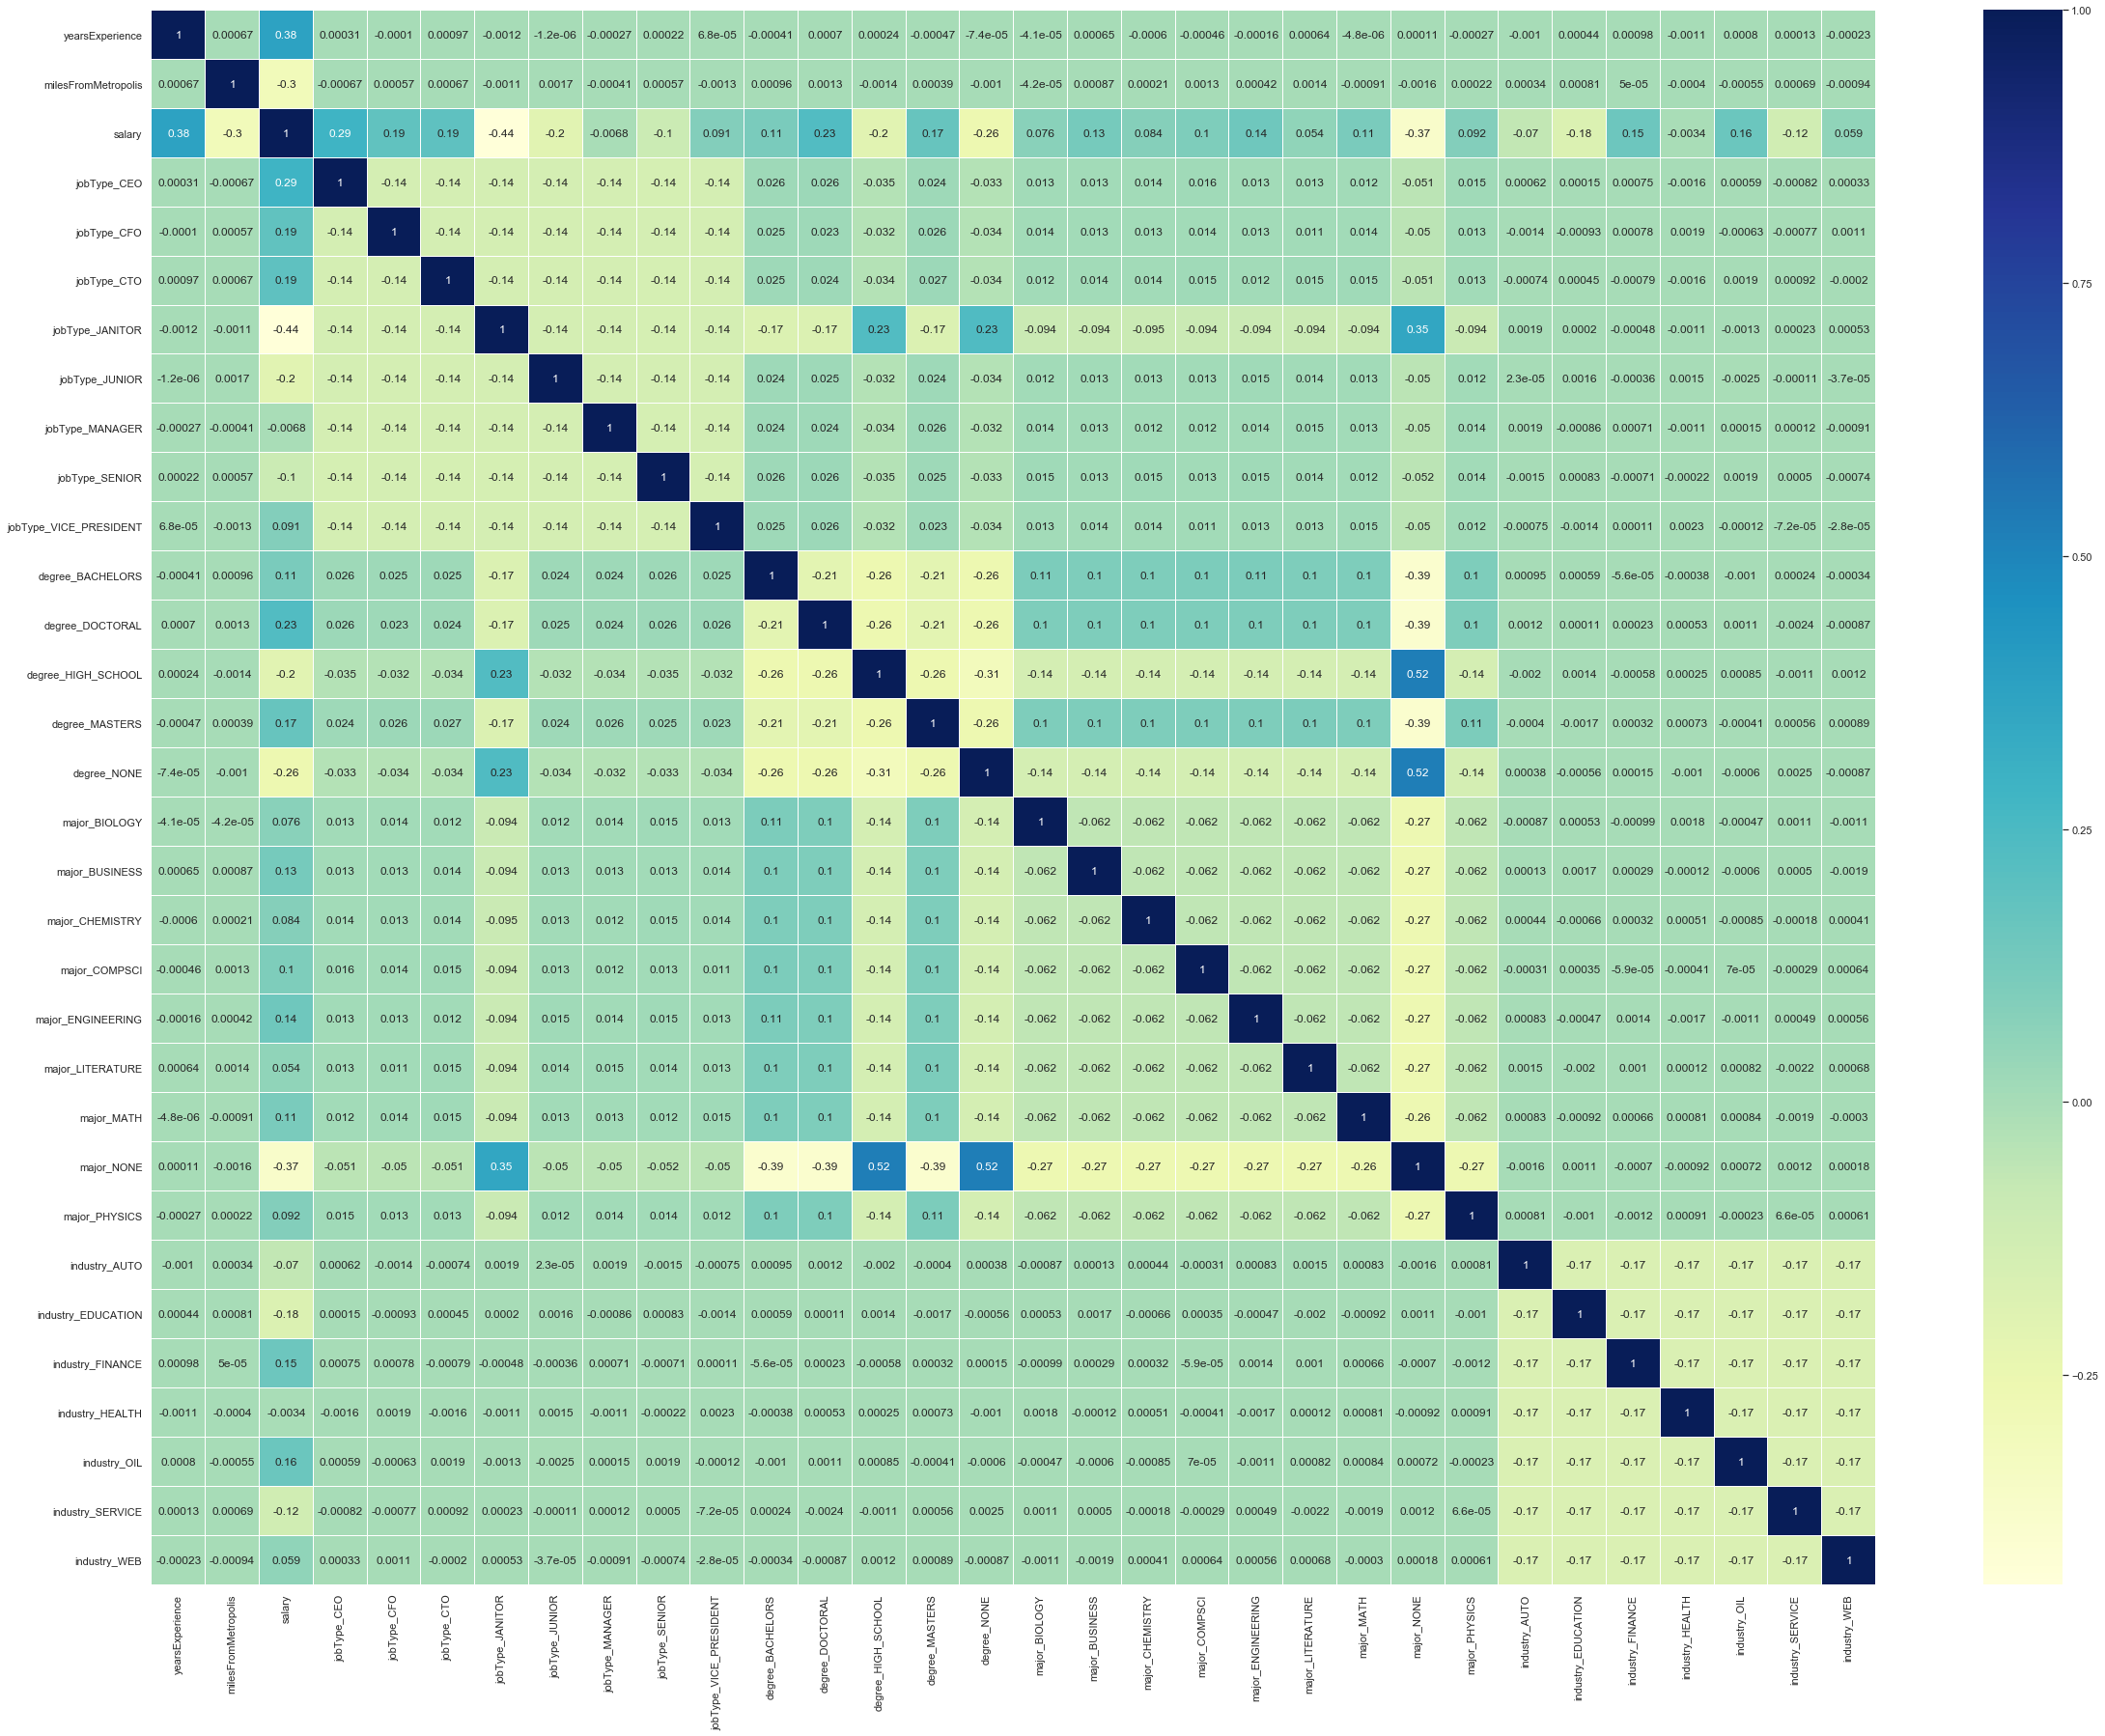

In [80]:
# Plot heatmap of all data with correlation coefficients visible
train_data_corr = train_data.corr()
plt.subplots(figsize=(40,30))
sns.heatmap(train_data_corr, cmap='YlGnBu', linewidth=.005, annot=True)

In [81]:
# Assign salary to "y" and all other features to "X". Split into training and testing variables.
X = train_data[train_data.loc[ : , train_data.columns != 'salary'].columns]
y = train_data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [82]:
# View inputs and outputs of training variables
print('Inputs: \n', X_train.head())
print('Outputs: \n', y_train.head())

Inputs: 
         yearsExperience  milesFromMetropolis  jobType_CEO  jobType_CFO  \
583582               17                   75            0            0   
465088               14                   88            1            0   
686214               12                   65            0            0   
176612                8                   68            0            0   
249785                3                   13            0            0   

        jobType_CTO  jobType_JANITOR  jobType_JUNIOR  jobType_MANAGER  \
583582            0                0               0                0   
465088            0                0               0                0   
686214            0                0               1                0   
176612            0                0               0                0   
249785            0                0               0                0   

        jobType_SENIOR  jobType_VICE_PRESIDENT  ...  major_MATH  major_NONE  \
583582               0     

# Model 1 : Simple linear Regression

In [83]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# View coefficients of linear regression object
print(lm.intercept_)
print(lm.coef_)


91565795126.92426
[ 2.01084582e+00 -3.99647733e-01 -8.46859468e+10 -8.46859468e+10
 -8.46859468e+10 -8.46859469e+10 -8.46859469e+10 -8.46859469e+10
 -8.46859469e+10 -8.46859469e+10  6.27693143e+09  6.27693144e+09
  6.27693142e+09  6.27693143e+09  6.27693142e+09 -2.95302026e+09
 -2.95302026e+09 -2.95302026e+09 -2.95302026e+09 -2.95302025e+09
 -2.95302027e+09 -2.95302026e+09 -2.95302027e+09 -2.95302026e+09
 -1.02037593e+10 -1.02037593e+10 -1.02037593e+10 -1.02037593e+10
 -1.02037593e+10 -1.02037593e+10 -1.02037593e+10]


In [85]:
# Making the predictions on the training data
yhat_train = lm.predict(X_train)

# View first 5 predictions
print("The output of the first 12 predicted values on the training data are:", yhat_train[0:12])

The output of the first 12 predicted values on the training data are: [126.75444031 144.07192993  93.90696716 113.80154419 133.27696228
 147.83651733 145.49320984 117.98147583 154.49076843  36.12052917
  65.64964294 100.03707886]


In [86]:
# Print MSE of training data
print("The mean squared error of our prediction model on the training data is:", mean_squared_error(y_train, yhat_train))

The mean squared error of our prediction model on the training data is: 384.2694830349012


In [122]:
rmse_train_model1 = math.sqrt(mean_squared_error(y_train, yhat_train))
print(rmse_train_model1)

19.602792735600232


In [123]:
# Print accuracy score using 5-fold cross validation
scores = cross_val_score(lm, X_train, y_train, cv=5)
print("5-Fold Cross Validation Accuracy (train data):", (np.mean(scores)), (np.std(scores)))

5-Fold Cross Validation Accuracy (train data): 0.7433245919265348 0.0005871339831647587


In [124]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, title):
    width = 10
    height=6
    plt.figure(figsize=(width, height))
    
    ax1=sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2=sns.distplot(BlueFunction, hist=False, color="b", label=BlueName)
    
    plt.title(title)
    plt.xlabel("Proportion of Jobs")
    plt.ylabel("Salary (in thousand dollars)")
    plt.show()
    plt.close()


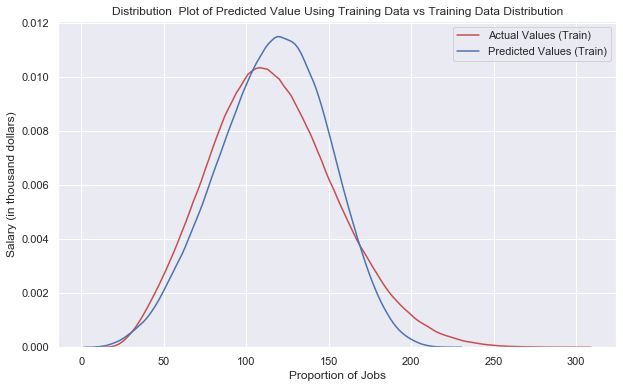

In [125]:
# View distribution of actual salaries compared to predicted salaries
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [126]:
# Predicting on the test data using the simple linear regression model
yhat_test = lm.predict(X_test)

# View first 12 predictions
yhat_test[0:12]

array([157.79992676,  62.3664856 , 108.70930481, 112.59162903,
        92.5193634 , 108.05780029, 128.91082764, 141.02583313,
        48.38702393,  75.96447754, 153.24485779,  64.34909058])

In [127]:
# Print MSE of test data for the simple linear regression model
print("The mean squared error of our test set predicitons is:", mean_squared_error(y_test, yhat_test))

The mean squared error of our test set predicitons is: 384.82988750470025


In [128]:
rmse_test_model1 = math.sqrt(mean_squared_error(y_test, yhat_test))
print(rmse_test_model1)

19.617081523628848


In [129]:
# Print accuracy score using 5-fold cross validation
scores = cross_val_score(lm, X_test, y_test, cv=5)
print("5-Fold Cross Validation Accuracy (test data):", (np.mean(scores)), (np.std(scores)))

5-Fold Cross Validation Accuracy (test data): 0.7443984634778346 0.002713859634885687


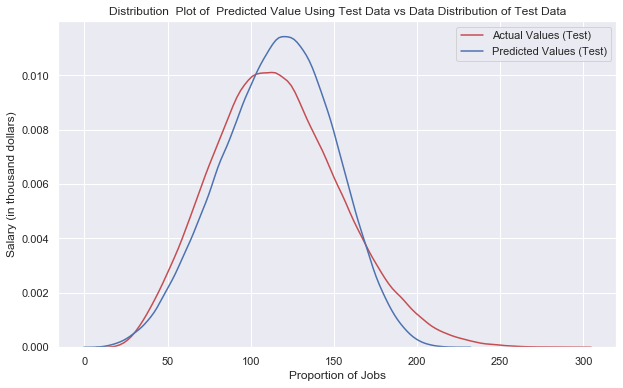

In [130]:
# View distribution of actual salaries compared to predicted salaries
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

# Model 2 : Polynomial Transformation

The first solution attempted will be applying polynomial transformation to the linear regression model that was already created to see if error is reduced.

In [131]:
# Fit and transform the variables using 2nd order polynomial
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [132]:
# Create new model using polynomial transformation
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
#make predictions and view first five predictions on train data - 
yhat_poly = poly_model.predict(X_train_poly)
print ('First 12 predictions(train data)', yhat_poly[0:12])

First 12 predictions(train data) [122.86992273 154.66690454  93.94714746 108.47558984 124.42797861
 138.39606103 139.77331933 118.08034143 163.57835779  35.66840753
  66.00513086 115.62317285]


In [134]:
#Compare first 12 predicted values vs actual values - 
print ('Predicted Values(train)', yhat_poly[0:12])
print ('Actual Values(train)', y_test[0:12].values)

Predicted Values(train) [122.86992273 154.66690454  93.94714746 108.47558984 124.42797861
 138.39606103 139.77331933 118.08034143 163.57835779  35.66840753
  66.00513086 115.62317285]
Actual Values(train) [186  67  82 104 106  89 133 139  35  93 188  57]


In [135]:
yhat_polyTest = poly_model.predict(X_test_poly)
yhat_polyTest[0:10]

array([159.45593652,  60.17755517,  96.76084146,  99.53611955,
        93.32835779, 109.73438653, 124.10933313, 142.71469507,
        47.58796319,  76.58449945])

In [136]:
print("Predicted Values:", yhat_polyTest[0:12])
print("True Values:", y_test[0:12].values)

Predicted Values: [159.45593652  60.17755517  96.76084146  99.53611955  93.32835779
 109.73438653 124.10933313 142.71469507  47.58796319  76.58449945
 157.64412317  64.75799951]
True Values: [186  67  82 104 106  89 133 139  35  93 188  57]


In [137]:
print("R-squared of training data:", poly_model.score(X_train_poly, y_train))
print("R-squared of test data:", poly_model.score(X_test_poly, y_test))

R-squared of training data: 0.7638906906340794
R-squared of test data: 0.7645098272046842


In [138]:
print("MSE of training data:", mean_squared_error(y_train, yhat_poly))
print("MSE of test data:", mean_squared_error(y_test, yhat_polyTest))

MSE of training data: 353.51693506261546
MSE of test data: 354.6558662958541


In [139]:
print("RMSE of training data:", math.sqrt(mean_squared_error(y_train, yhat_poly)))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, yhat_polyTest)))

RMSE of training data: 18.80204603394576
RMSE of test data: 18.832309106847575


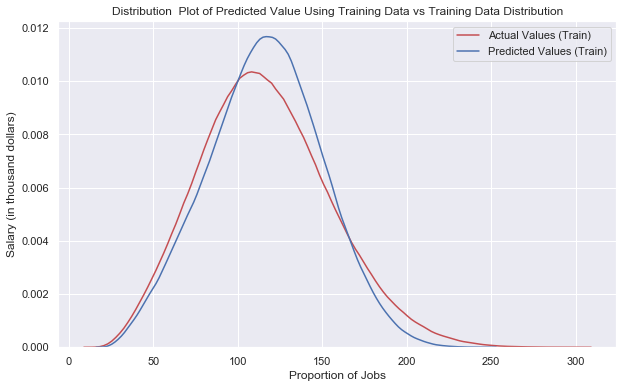

In [140]:
Title = 'Distribution  Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_poly, "Actual Values (Train)", "Predicted Values (Train)", Title)

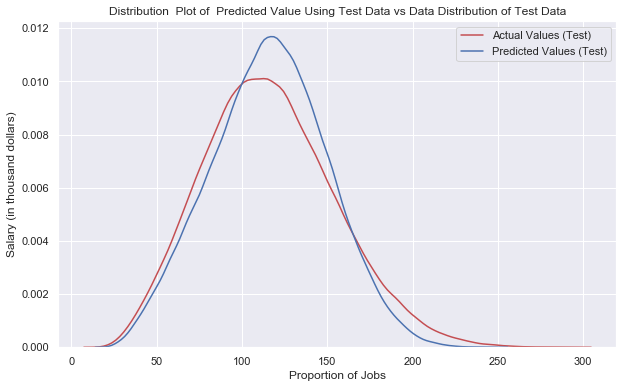

In [141]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_polyTest,"Actual Values (Test)","Predicted Values (Test)",Title)

# Model 3 : Ridge Model 

Ridge Regression is a type of Linear Regression which is used to check the linear dependencies in the dataset. Ridge regression helps in mitigating overfitting. Hence, this model can be useful if structure of data consists linear dependencies.

Lets apply the ridge regression to lower the MSE and RMSE

In [142]:
ridge_model = Ridge(alpha=1.0)

In [143]:
ridge_model.fit(X_train_poly, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [144]:
yhat_ridge_train = ridge_model.predict(X_train_poly)
yhat_ridge_test = ridge_model.predict(X_test_poly)

In [145]:
print('Predicted:', yhat_ridge_train[0:12])
print('Actual :', y_train[0:12].values)

Predicted: [122.80535226 154.60016552  93.93272274 108.47222045 124.48606383
 138.27363169 139.70864077 118.1188418  163.60834912  35.72598843
  65.91820723 115.63561377]
Actual : [ 90 164  87 126 133 169 130 139 175  40  57  93]


In [146]:
print('Predicted:', yhat_ridge_test[0:12])
print('Actual :', y_test[0:12].values)

Predicted: [159.45593431  60.11135936  96.82007354  99.5978305   93.33677685
 109.73386341 124.15434592 142.76090411  47.64407925  76.62949781
 157.68750129  64.71766396]
Actual : [186  67  82 104 106  89 133 139  35  93 188  57]


In [147]:
print("R-squared of training data:", ridge_model.score(X_train_poly, y_train))
print("R-squared of test data:", ridge_model.score(X_test_poly, y_test))
# No significant improvement

R-squared of training data: 0.7638922261902712
R-squared of test data: 0.7645108187953097


In [148]:
print("MSE of training data:", mean_squared_error(y_train, yhat_ridge_train))
print("MSE of test data:", mean_squared_error(y_test, yhat_ridge_test))

MSE of training data: 353.5146359363337
MSE of test data: 354.6543729280922


In [149]:
print("RMSE of training data:", math.sqrt(mean_squared_error(y_train, yhat_ridge_train)))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, yhat_ridge_test)))

RMSE of training data: 18.80198489352477
RMSE of test data: 18.83226945771784


No significant improvement in R-square , RMSE or MSE

We will use gridsearch to ensure best hyperparameter was used:

In [150]:
gridSearch_params= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
gridSearch_params

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [151]:
ridge_object = Ridge()
ridge_object

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Create ridge grid search object and fit:

In [152]:
Grid1 = GridSearchCV(ridge_object, gridSearch_params, cv=5)

In [153]:
Grid1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [154]:
best_ridge_model = Grid1.best_estimator_
best_ridge_model

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [155]:
best_ridge_model.score(X_test, y_test)

0.744474388773942

# Random Forest Model

We use Random forest because it has the power to handle a large data set with higher dimensionality and is robust while working on large proportion of dataset, also controlling overfitting by using more number of trees.

In [112]:
rf = RandomForestRegressor(n_estimators=250, n_jobs=4, max_depth=30, 
                           min_samples_split=60, max_features='auto', verbose=0)

In [113]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=60,
                      min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [114]:
rf_predictions = rf.predict(X_test)
rf_predictions[0:12]


array([158.88301947,  61.16718176,  96.49912964,  96.95328965,
        94.21104106, 109.68115662, 127.91793437, 148.20296065,
        47.06372985,  79.04100799, 151.52762277,  64.57880159])

In [115]:
print("R-squared of test data:", rf.score(X_test, y_test))
print("MSE of test data:", mean_squared_error(y_test, rf_predictions))
print("RMSE of test data:", mean_squared_error(y_test, rf_predictions))

R-squared of test data: 0.7567495447694769
MSE of test data: 366.34310426884224
RMSE of test data: 366.34310426884224


In [116]:
# Tuning the Random Forest Model

# Max features
max_features = ['auto', 'log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 15, num = 3)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 15, 20]

# Create the random grid
random_grid = {
               'max_features': max_features, 
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

print(random_grid)

{'max_features': ['auto', 'log2', 'sqrt'], 'max_depth': [5, 10, 15], 'min_samples_split': [5, 10, 15, 20], 'min_samples_leaf': [5, 10, 15, 20]}


In [117]:
# Random search to tune hyper parameters
rf_model = RandomForestRegressor(random_state=123,
                                n_jobs=-1)

rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,
                              cv=3)

rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_state=123

In [118]:
rf_random.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 15}

In [119]:
# Best random forest predictions
rf_pred = rf_random.predict(X_test)

In [120]:
# Best random forest predictions

print("R-squared of test data:", rf_random.score(X_test, y_test))
print("MSE of test data:", mean_squared_error(y_test, rf_pred))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, rf_pred)))

R-squared of test data: 0.743850661587152
MSE of test data: 385.76924224723126
RMSE of test data: 19.641009196251378


## Feature importance 

In [236]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)


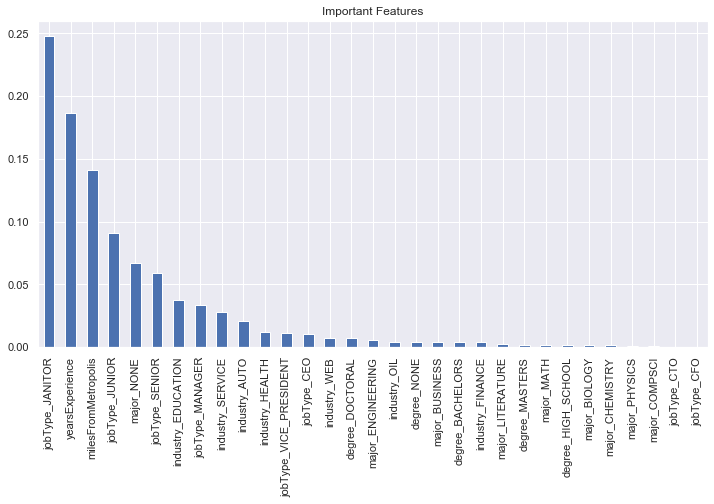

In [237]:
feature_scores.plot(kind='bar', figsize=(12,6))
plt.title("Important Features")
plt.savefig('Imortant Features.png')
plt.show()

# Gradient boosting Model

Gradient Boosted Decision Trees (GBDT) builds a series of small decision trees where each tree attempts to correct errors from the previous stage. GBDT are often best models in many problems, so it's worth using them.

In [107]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [108]:
GB = GradientBoostingRegressor(n_estimators=250, max_depth=6, loss='ls',learning_rate=0.1,verbose=0)

In [109]:
GB.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
# Salary predictions 
gb_pred = GB.predict(X_test)
print("R-squared of test data:", GB.score(X_test, y_test))
print("MSE of test data:", mean_squared_error(y_test, gb_pred))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, gb_pred)))

R-squared of test data: 0.7629547662758139
MSE of test data: 356.99783867765143
RMSE of test data: 18.89438643295017


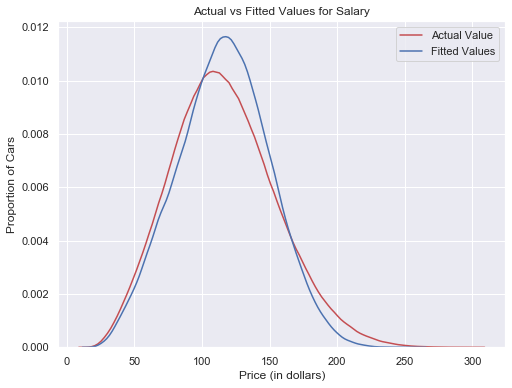

In [111]:
plt.figure(figsize=(8, 6))
ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(gb_pred, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Salary')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# XGBoost model

In [88]:
dtest = xgb.DMatrix(X_test, label=y_test)
dtrain=xgb.DMatrix(X_train, label=y_train)
num_boost_round=999

max_depths = [i for i in range(3,10,2)]
min_child_weights = [j for j in range(5, 30, 5)]
etas = [0.3, 0.2, 0.1]

In [89]:
# Grid
max_depth = [i for i in range(3,10,2)]
learning_rate = [0.3, 0.2, 0.1]
min_child_weight = [j for j in range(5,25,5)]
subsample = [0.7, 0.8, 0.9, 1.0]
colsample_bytree = [0.7, 0.8, 0.9, 1.0]


param_grid = {
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "min_child_weight": min_child_weight,
    "subsample": subsample,
    "colsample_bytree": colsample_bytree
}

param_grid

{'max_depth': [3, 5, 7, 9],
 'learning_rate': [0.3, 0.2, 0.1],
 'min_child_weight': [5, 10, 15, 20],
 'subsample': [0.7, 0.8, 0.9, 1.0],
 'colsample_bytree': [0.7, 0.8, 0.9, 1.0]}

In [90]:
xgb_model = xgb.XGBRegressor(n_estimators = 200, 
                            n_jobs=-1, random_state=123)

In [91]:
xgb_cv_model = RandomizedSearchCV(xgb_model, param_distributions=param_grid,
                                 cv=3)

xgb_cv_model.fit(X_train, y_train)

[22:07:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:09:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:10:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:15:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:17:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=200,
                                          n_jobs=-1, nthread=None,
                                          objective='reg:linear',
                                          random_s...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='warn', n_iter=10, n_jobs=None,

In [92]:
# storing the optimal parameters 
best_params = xgb_cv_model.best_params_
best_params

{'subsample': 0.7,
 'min_child_weight': 10,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}

In [93]:
num_boost_round=200
xgb_best_model = xgb.train(best_params,
                 dtrain,
                 num_boost_round=num_boost_round,
                 evals=[(dtest, "Test")], 
                 early_stopping_rounds=5,
                 verbose_eval=False)

In [105]:
xgb_predictions = xgb_best_model.predict(dtest)

print("MSE of test data:", mean_squared_error(y_test, xgb_predictions))
print("RMSE of test data:", math.sqrt(mean_squared_error(y_test, xgb_predictions)))

MSE of test data: 356.8437183914703
RMSE of test data: 18.89030752506349


# Deep Neural network model

Remove 0 duplicated jobs
Remove 0 duplicated jobs
Remove 0 jobs with missing values
Remove 0 jobs with missing values
Remove 0 jobs with invalid yearsExperience
Remove 0 jobs with invalid yearsExperience
Remove 0 jobs with invalid milesFromMetropolis
Remove 0 jobs with invalid milesFromMetropolis
Remove 5 jobs with invalid salary
After clean up train dataset has shape: (999995, 9)
After clean up test dataset has shape: (1000000, 8)

Fill 0 missing values with feature mean
Fill 908 missing values with feature mean
Epoch 1/100
883/900 [============================>.] - ETA: 0s - loss: 499.0934 - mse: 499.0934
Epoch 00001: val_loss improved from inf to 345.58304, saving model to best-weight-batch_size_1000-epochs_100.hdf5
900/900 [==============================] - 2s 2ms/step - loss: 496.3315 - mse: 496.3315 - val_loss: 345.5830 - val_mse: 345.5830
Epoch 2/100
878/900 [============================>.] - ETA: 0s - loss: 338.5603 - mse: 338.5603
Epoch 00002: val_loss improved from 345.58304 

Epoch 26/100
883/900 [============================>.] - ETA: 0s - loss: 307.5979 - mse: 307.5979
Epoch 00026: val_loss did not improve from 303.27036
900/900 [==============================] - 2s 2ms/step - loss: 307.5561 - mse: 307.5561 - val_loss: 306.2292 - val_mse: 306.2292
Epoch 27/100
884/900 [============================>.] - ETA: 0s - loss: 307.0632 - mse: 307.0632
Epoch 00027: val_loss did not improve from 303.27036
900/900 [==============================] - 2s 2ms/step - loss: 307.2104 - mse: 307.2104 - val_loss: 307.4969 - val_mse: 307.4969
Epoch 28/100
891/900 [============================>.] - ETA: 0s - loss: 306.5654 - mse: 306.5654
Epoch 00028: val_loss did not improve from 303.27036
900/900 [==============================] - 2s 2ms/step - loss: 306.7305 - mse: 306.7305 - val_loss: 308.3626 - val_mse: 308.3626
Epoch 29/100
886/900 [============================>.] - ETA: 0s - loss: 306.6921 - mse: 306.6921
Epoch 00029: val_loss did not improve from 303.27036
900/900 [====

Epoch 55/100
895/900 [============================>.] - ETA: 0s - loss: 304.8306 - mse: 304.8306
Epoch 00055: val_loss improved from 301.93204 to 301.68835, saving model to best-weight-batch_size_1000-epochs_100.hdf5
900/900 [==============================] - 2s 3ms/step - loss: 304.8327 - mse: 304.8327 - val_loss: 301.6884 - val_mse: 301.6884
Epoch 56/100
898/900 [============================>.] - ETA: 0s - loss: 304.7895 - mse: 304.7895
Epoch 00056: val_loss did not improve from 301.68835
900/900 [==============================] - 2s 2ms/step - loss: 304.7745 - mse: 304.7745 - val_loss: 303.1909 - val_mse: 303.1909
Epoch 57/100
883/900 [============================>.] - ETA: 0s - loss: 305.3629 - mse: 305.3629
Epoch 00057: val_loss did not improve from 301.68835
900/900 [==============================] - 2s 2ms/step - loss: 305.3285 - mse: 305.3285 - val_loss: 303.9961 - val_mse: 303.9961
Epoch 58/100
895/900 [============================>.] - ETA: 0s - loss: 304.4399 - mse: 304.4399

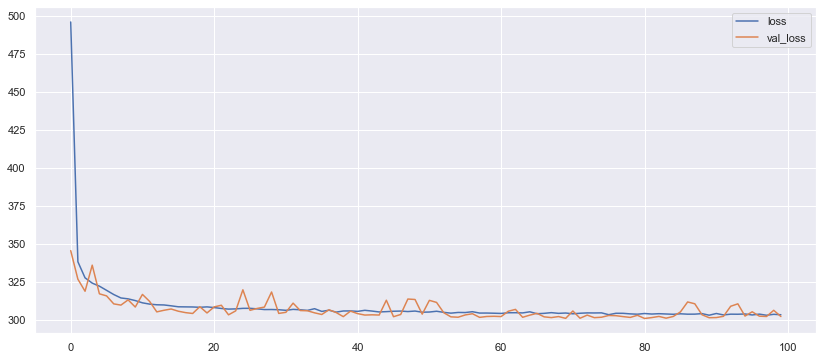

In [165]:
import os
import tensorflow as tf
pd.set_option('precision', 3)


class Data:
    """
    Data container. Base class. Handles basic data cleaning, preping, and
    encoding.
    """
    def __init__(self, train_file, target_file, test_file, target, index):
        """
        Class constructor.
        Args:
            train_file: relative path pointed at train file containing 
                features data
            target_file: relative path pointed at train file containing 
                target data
            test_file: relative path pointed at test file containing 
                features dataset
            target: target column name
            index: index column name
        """
        self.train = None
        self.test = None
        self.features = None
        self.target = target
        self.index = index

        self._load_data(train_file, target_file, test_file)
        self._clean_data()
        print("After clean up train dataset has shape:", self.train.shape)
        print("After clean up test dataset has shape:", self.test.shape)
        print()

    def encode_data(self):
        """
        Transform feature columns using group average salary
        """
        for col in self.features:
            group_dict = dict(self.train.groupby([col])[self.target].mean())
            self.train[col] = self.train[col].map(group_dict)
            self.test[col] = self.test[col].map(group_dict)

    def split_data(self):
        """
        Split and return feature and target dataframe
        Returns:
            Tuple of feature and target dataframe
        """
        return self.train.drop(columns=self.target), self.train[self.target]
    
    def get_baseline(self):
        """
        Compute and return baseline model MSE
        Returns:
            Baseline model MSE
        """
        baseline_true = self.train[self.target].values.astype(float)
        mean_dict = dict(self.train.groupby(['industry'])[self.target].mean())
        baseline_pred = self.train.industry.map(mean_dict)
        baseline_mse = mean_squared_error(baseline_true, baseline_pred)
        print("Baseline: MSE=%.3f\n" % baseline_mse)
        return baseline_mse

    def _load_data(self, train_file, target_file, test_file):
        """
        Load data from files
        Args:
            train_file: relative path pointed at train file containing 
                features data
            target_file: relative path pointed at train file containing 
                target data
            test_file: relative path pointed at test file containing 
                features dataset
        """
        self.train = pd.read_csv(train_file)
        self.features = self.train.drop(columns=self.index).columns.values
        self.train = pd.merge(self.train, pd.read_csv(target_file), on=self.index)
        self.test = pd.read_csv(test_file)

    def _clean_data(self):
        """
        Check and remove invalid instance(s)
        """
        self._drop_duplicates(self.train)
        self._drop_duplicates(self.test)
        self._drop_null(self.train)
        self._drop_null(self.test)
        self._check_col_validity(self.train, 'yearsExperience', 0)
        self._check_col_validity(self.test,  'yearsExperience', 0)
        self._check_col_validity(self.train, 'milesFromMetropolis', 0)
        self._check_col_validity(self.test,  'milesFromMetropolis', 0)
        self._check_col_validity(self.train, 'salary', 1)

    def _drop_duplicates(self, df):
        """
        Drop duplicated instance(s)
        Args:
            df: dataframe to be checked
        """
        print("Remove %d duplicated jobs" % df.duplicated().sum())
        df.drop_duplicates(inplace=True)

    def _drop_null(self, df):
        """
        Drop instance(s) with np.None or np.NaN
        Args:
            df: dataframe to be checked
        """
        invalid_jobs = df.index[df.isnull().sum(axis=1).gt(0)].values
        print("Remove %d jobs with missing values" % len(invalid_jobs))
        df.drop(index=invalid_jobs, inplace=True)

    def _fill_null(self, df):
        """
        Fill np.None or np.NaN with mean value
        Args:
            df: dataframe to be checked
        """
        invalid_jobs = df.index[df.isnull().sum(axis=1).gt(0)].values
        print("Fill %d missing values with feature mean" % len(invalid_jobs))
        df.fillna(df.mean(), inplace=True)
    
    def _check_col_validity(self, df, col, threshold):
        """
        Drop instance(s) having invalid value at given column
        Args:
            df: dataframe to be checked
            col: column to be inspect
            threshold: invalid if value less than threshold
        """
        invalid_jobs = df.index[df[col].lt(threshold)]
        print("Remove %d jobs with invalid %s" % (len(invalid_jobs), col))
        df.drop(index=invalid_jobs, inplace=True)


class FeatureEngineer(Data):
    """
    Engineered data container. Inherite from Data base class. Handles 
    advanced data engineering.
    """
    def __init__(self, train_file, target_file, test_file, target, index):
        """
        Class constructor.
        Args:
            train_file: relative path pointed at train file containing 
                features data
            target_file: relative path pointed at train file containing 
                target data
            test_file: relative path pointed at test file containing 
                features dataset
            target: target column name
            index: index column name
        """
        Data.__init__(self, train_file, target_file, test_file, target, index)
        self._stats = []

    def add_stats(self, cols, col_name):
        """
        Engineer group statistics and merge with train and test dataframe
        Args:
            cols: list of columns
            col_name: prefix added to new column names
        """
        self._generate_stats(cols, col_name)
        self.train = self._merge_stats(self.train, cols)
        self.test = self._merge_stats(self.test,  cols)

    def _generate_stats(self, cols, col_name):
        """
        Engineer group statistics
        Args:
            cols: list of columns
            col_name: prefix added to new column names
        """
        group = self.train.groupby(cols)[self.target]
        Q1 = group.quantile(0.25)
        Q3 = group.quantile(0.75)
        upper_bound = Q3 + 1.5 * (Q3 - Q1)
        
        self._stats = pd.DataFrame({col_name+"_mean" : group.mean()})
        self._stats[col_name + "_min"] = group.min()
        self._stats[col_name + "_Q1"] = Q1
        self._stats[col_name + "_median"] = group.median()
        self._stats[col_name + "_Q3"] = Q3
        self._stats[col_name + "_upper"] = upper_bound
        self._stats[col_name + "_max"] = group.max()
        
    def _merge_stats(self, df, cols):
        """
        Merge group statistics to dataframe
        
        Args:
            df: dataframe to be merged
            cols: list of columns
            
        Returns:
            df: modified dataframe
        """
        df = pd.merge(df, self._stats, on=cols, how='left')
        df.set_index(self.index, inplace=True)
        self._fill_null(df)
        return df


if __name__ == "__main__":
    # Data engineering and encoding
    dataset = FeatureEngineer("train_features.csv",
                              "train_salaries.csv",
                              "test_features.csv",
                              'salary',
                              'jobId')
    features = ['companyId', 'jobType', 'degree', 'major', 'industry']
    dataset.add_stats(features, "CJDMI")    
    dataset.encode_data()
    
    # Split data
    train_X, train_y = dataset.split_data()
    
    # Define and compile model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu', 
                              input_shape=(train_X.shape[1],)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(1)
        ])
    model.compile(loss='mse', optimizer=tf.optimizers.Adam(), metrics=['mse'])
    
    # Fit model
    weightpath = "best-weight-batch_size_1000-epochs_100.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(weightpath, 
                                                    monitor='val_loss', 
                                                    verbose=True, 
                                                    save_best_only=True, 
                                                    mode='auto')
    history = model.fit(train_X, train_y, batch_size=1000, epochs=100, 
                        validation_split=0.1, callbacks=[checkpoint])
    
    # Plot loss and val_loss
    pngpath = "loss-batch_size_1000-epochs_100.png"
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss', 'val_loss'])
    plt.savefig(pngpath)
    
    # Make prediction using model with best weight
    model.load_weights(weightpath)
    test_pred = model.predict(dataset.test)
    
    # Export prediction to csv file
    csvpath = "test_salaries_prediction_dnn.csv"
    pd.DataFrame(test_pred, index=dataset.test.index,
                 columns=[dataset.target]).to_csv(csvpath)

In [166]:
print("MSE of the Deep Neural network on the training data:", mean_squared_error(train_y, model.predict(train_X)))

MSE of the Deep Neural network on the training data: 300.67752016836147


In [167]:
print("RMSE of the Deep Neural network on the training data:", math.sqrt(mean_squared_error(train_y, model.predict(train_X))))

RMSE of the Deep Neural network on the training data: 17.340055368088116


In [214]:
test_salaries_dnn = pd.read_csv('test_salaries_prediction_dnn.csv')

In [218]:
test_salaries_dnn.shape

(1000000, 2)

In [216]:
test_salaries_dnn.head(20)

,jobId,salary
0,JOB1362685407687,111.889
1,JOB1362685407688,89.691
2,JOB1362685407689,163.198
3,JOB1362685407690,106.491
4,JOB1362685407691,109.281
5,JOB1362685407692,163.161
6,JOB1362685407693,103.510
7,JOB1362685407694,128.477
8,JOB1362685407695,100.487
9,JOB1362685407696,99.289


In [180]:
test_features_dnn.shape

(1000000, 10)